##### EDA for lending club assingment to determine if the borrower would default or not while applying for loan
###### Assumptions:
###### 1. The dataset contains all the variables related to the credit bureau and no exploration on public source is needed
###### 2. Current member data need not be considered as we cannot determine the default behaviour without bias
###### 3. Customer behaviours not considered for analysis


In [1]:
# Import all needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sbs
from matplotlib.pyplot import figure
pd.set_option('display.max_columns', 200)

###### Step 1: Data understanding steps:

In [2]:
# Step 1: Load the dataset 
loan_ds = pd.read_csv("loan.csv")
loan_ds.head()

C:\Users\I349261\AppData\Local\Temp\ipykernel_43668\2808325636.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_ds = pd.read_csv("loan.csv")


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [3]:
# Check shape of the dataset
loan_ds.shape

(39717, 111)

In [4]:
# Check datatype of the dataset columns
loan_ds.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [5]:
# Get stats for numeric data
loan_ds.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  39717.000000    39717.000000            14035.000000   
mean       0.146512        0.869200               35.900962   
std        0.491812        1.070219               22.020060   
min        0.000000        0.000000                0.000000   
25%        0.000000        0.000000               18.000000   
50%        0.000000        1.000000               34.000000   
75%        0.000000        1.000000               52.000000   
max       11.000000        8.000000              120.000000   

       mths_since_last_record      open_acc       pub_rec      revol_bal  \
count             2786.000000  39717.000000  39717.000000   39717.000000   
mean                69.698134      9.294408      0.055065   13382.528086   
std                 43.822529      4.400282      0.237200   15885.016641   
min                  0.000000      2.000000      0.000000       0.000000   
25%                 22.000000      6.000000      0.000000    3703.000000   
50%                 90.000000      9.000000      0.000000    8850.000000   
75%                104.000000     12.000000      0.000000   17058.000000   
max                129.000000     44.000000      4.000000  149588.000000   

          total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  39717.000000  39717.000000   39717.000000  39717.000000   
mean      22.088828     51.227887      50.989768  12153.596544   
std       11.401709    375.172839     373.824457   9042.040766   
min        2.000000      0.000000       0.000000      0.000000   
25%       13.000000      0.000000       0.000000   5576.930000   
50%       20.000000      0.000000       0.000000   9899.640319   
75%       29.000000      0.000000       0.000000  16534.433040   
max       90.000000   6311.470000    6307.370000  58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     39717.000000     39717.000000   39717.000000        39717.000000   
mean      11567.149118      9793.348813    2263.663172            1.363015   
std        8942.672613      7065.522127    2608.111964            7.289979   
min           0.000000         0.000000       0.000000            0.000000   
25%        5112.310000      4600.000000     662.180000            0.000000   
50%        9287.150000      8000.000000    1348.910000            0.000000   
75%       15798.810000     13653.260000    2833.400000            0.000000   
max       58563.680000     35000.020000   23563.680000          180.200000   

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  39717.000000             39717.000000     39717.000000   
mean      95.221624                12.406112      2678.826162   
std      688.744771               148.671593      4447.136012   
min    

In [6]:
loan_ds.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

##### Insights from data understanding step:
###### 1. There are 39717 rows and 111 columns in dataset
###### 2. There are lot of columns with high percentage of missing data or null values
###### 3. There are instances where the loan was rejected by the investor even after the lending club agent had approved
###### 4. The max DTI that was accepted is ~30
###### 5. There is a lot of distribution in the data for loan amount, funded amount, funded amount invested, dti as the mean and median values shows a difference

#### Step 2: Data Cleaning

In [7]:
# You can observe that there are lot of columns with null values in the dataset.
# So let us try to remove them first

loan_ds.dropna(axis = 1, how = 'all', inplace = True)
loan_ds.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [8]:
# Remove columns which are related to customer behaviours
loan_ds.drop(columns=['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util',
                      'total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
                     'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
                     'next_pymnt_d','last_credit_pull_d','application_type','installment'],axis=1,inplace=True)

In [9]:
loan_ds.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
mths_since_last_delinq           95
mths_since_last_record          111
initial_list_status               1
collections_12_mths_ex_med  

In [10]:
#There are several columns which have only single values.
#I dont think they would be able to contribute to the analysis in any which way. Hence removing them.

loan_ds.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'chargeoff_within_12_mths', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan_ds.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate grade sub_grade                 emp_title emp_length  \
0   10.65%     B        B2                       NaN  10+ years   
1   15.27%     C        C4                     Ryder   < 1 year   
2   15.96%     C        C5                       NaN  10+ years   
3   13.49%     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

                                                 url  \
0  https://lendingclub.com/browse/loanDetail.acti...   
1  https://lendingclub.com/browse/loanDetail.acti...   
2  https://lendingclub.com/browse/loanDetail.acti...   
3  https://lendingclub.com/browse/loanDetail.acti...   
4  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  mths_since_last_delinq  \
0              Computer    860xx         AZ  27.65                     NaN   
1                  bike    309xx         GA   1.00                     NaN   
2  real estate business    606xx         IL   8.72                     NaN   
3              personel    917xx         CA  20.00                    35.0   
4              Personal    972xx         OR  17.94                    38.0   

   mths_since_last_record  pub_rec_bankruptcies  
0                     NaN                   0.0  
1                     NaN                   0.0  
2                     NaN                   0.0  
3                     NaN                   0.0  
4                     NaN                   0.0

In [11]:
#There are several columns which have only unique values
#I dont think they would be able to contribute to the analysis in any which way. Hence removing them.
loan_ds.drop(['id', 'member_id','url'], axis = 1, inplace = True)

In [12]:
loan_ds.shape


(39717, 23)

In [13]:
# We have around 23 columns now check if there is a huge percentage of missing values and remove the columns
# 1. Drop duplicate data
loan_ds.drop_duplicates()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate grade  \
0           5000         5000           4975.0   36 months   10.65%     B   
1           2500         2500           2500.0   60 months   15.27%     C   
2           2400         2400           2400.0   36 months   15.96%     C   
3          10000        10000          10000.0   36 months   13.49%     C   
4           3000         3000           3000.0   60 months   12.69%     B   
...          ...          ...              ...         ...      ...   ...   
39712       2500         2500           1075.0   36 months    8.07%     A   
39713       8500         8500            875.0   36 months   10.28%     C   
39714       5000         5000           1325.0   36 months    8.07%     A   
39715       5000         5000            650.0   36 months    7.43%     A   
39716       7500         7500            800.0   36 months   13.75%     E   

      sub_grade                   emp_title emp_length home_ownership  \
0            B2                         NaN  10+ years           RENT   
1            C4                       Ryder   < 1 year           RENT   
2            C5                         NaN  10+ years           RENT   
3            C1         AIR RESOURCES BOARD  10+ years           RENT   
4            B5    University Medical Group     1 year           RENT   
...         ...                         ...        ...            ...   
39712        A4             FiSite Research    4 years       MORTGAGE   
39713        C1  Squarewave Solutions, Ltd.    3 years           RENT   
39714        A4                         NaN   < 1 year       MORTGAGE   
39715        A2                         NaN   < 1 year       MORTGAGE   
39716        E2            Evergreen Center   < 1 year            OWN   

       annual_inc verification_status issue_d  loan_status  \
0         24000.0            Verified  Dec-11   Fully Paid   
1         30000.0     Source Verified  Dec-11  Charged Off   
2         12252.0        Not Verified  Dec-11   Fully Paid   
3         49200.0     Source Verified  Dec-11   Fully Paid   
4         80000.0     Source Verified  Dec-11      Current   
...           ...                 ...     ...          ...   
39712    110000.0        Not Verified  Jul-07   Fully Paid   
39713     18000.0        Not Verified  Jul-07   Fully Paid   
39714    100000.0        Not Verified  Jul-07   Fully Paid   
39715    200000.0        Not Verified  Jul-07   Fully Paid   
39716     22000.0        Not Verified  Jun-07   Fully Paid   

                                                    desc             purpose  \
0        Borrower added on 12/22/11 > I need to upgra...         credit_card   
1        Borrower added on 12/22/11 > I plan to use t...                 car   
2                                                    NaN      small_business   
3        Borrower added on 12/21/11 > to pay for prop...               other   
4        Borrower added on 12/21/11 > I plan on combi...               other   
...                                                  ...                 ...   
39712  Our current gutter system on our home is old a...    home_improvement   
39713  The rate of interest and fees incurred by carr...         credit_card   
39714                                                NaN  debt_consolidation   
39715                                                NaN               other   
39716  I plan to consolidate over $7,000 of debt: a c...  debt_consolidation   

                           title zip_code addr_state    dti  \
0                       Computer    860xx         AZ  27.65   
1                           bike    309xx         GA   1.00   
2           real estate business    606xx         IL   8.72   
3                       personel    917xx         CA  20.00   
4                       Personal    972xx         OR  17.94   
...                          ...      ...        ...    ...   
39712           Home Improvement    802xx         CO  11.3

In [14]:
# Remove columns which has null values with a threshold of 50% as this does not contibute to the analysis
loan_ds = loan_ds.dropna(axis=1,thresh = .5 * loan_ds.shape[0] )

In [15]:
# Remove rows which has high percentage data missing
loan_ds = loan_ds.dropna(axis=0,thresh = .5 * loan_ds.shape[1] )

In [16]:
pd.isnull(loan_ds).sum()

loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
grade                       0
sub_grade                   0
emp_title                2459
emp_length               1075
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
desc                    12940
purpose                     0
title                      11
zip_code                    0
addr_state                  0
dti                         0
pub_rec_bankruptcies      697
dtype: int64

In [17]:
# Remove rows with null values
loan_ds_cpy = loan_ds.copy()
loan_ds_cpy.dropna(axis=0,how='any')

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate grade  \
1           2500         2500           2500.0   60 months   15.27%     C   
3          10000        10000          10000.0   36 months   13.49%     C   
4           3000         3000           3000.0   60 months   12.69%     B   
6           7000         7000           7000.0   60 months   15.96%     C   
7           3000         3000           3000.0   36 months   18.64%     E   
...          ...          ...              ...         ...      ...   ...   
39551      12375        12375           1000.0   36 months   10.91%     C   
39562       4800         4800           1100.0   36 months   10.28%     C   
39623       9000         9000            700.0   36 months   12.49%     D   
39666      15450        15450            600.0   36 months   11.22%     C   
39680       3000         3000            525.0   36 months   11.86%     D   

      sub_grade                  emp_title emp_length home_ownership  \
1            C4                      Ryder   < 1 year           RENT   
3            C1        AIR RESOURCES BOARD  10+ years           RENT   
4            B5   University Medical Group     1 year           RENT   
6            C5  Southern Star Photography    8 years           RENT   
7            E1            MKC Accounting     9 years           RENT   
...         ...                        ...        ...            ...   
39551        C3          Fullmoon Software    2 years           RENT   
39562        C1              E.E. Wine Inc     1 year           RENT   
39623        D3                    Maximus    8 years       MORTGAGE   
39666        C4                       ARIN    2 years       MORTGAGE   
39680        D1    Fairfield Manufacturing    2 years       MORTGAGE   

       annual_inc verification_status issue_d  loan_status  \
1         30000.0     Source Verified  Dec-11  Charged Off   
3         49200.0     Source Verified  Dec-11   Fully Paid   
4         80000.0     Source Verified  Dec-11      Current   
6         47004.0        Not Verified  Dec-11   Fully Paid   
7         48000.0     Source Verified  Dec-11   Fully Paid   
...           ...                 ...     ...          ...   
39551     80000.0        Not Verified  Dec-07   Fully Paid   
39562     35000.0        Not Verified  Nov-07   Fully Paid   
39623     39000.0        Not Verified  Oct-07  Charged Off   
39666     40000.0        Not Verified  Aug-07  Charged Off   
39680     36153.0        Not Verified  Aug-07   Fully Paid   

                                                    desc             purpose  \
1        Borrower added on 12/22/11 > I plan to use t...                 car   
3        Borrower added on 12/21/11 > to pay for prop...               other   
4        Borrower added on 12/21/11 > I plan on combi...               other   
6        Borrower added on 12/18/11 > I am planning o...  debt_consolidation   
7        Borrower added on 12/16/11 > Downpayment for...                 car   
...                                                  ...                 ...   
39551  Simply looking to pay off credit cards, consol...  debt_consolidation   
39562  Need loan to pay off high intrest credit cards...  debt_consolidation   
39623  I would like to pay off my credit cards and a ...  debt_consolidation   
39666  Thank you for reviewing my request.  This loan...  debt_consolidation   
39680  I am currently paying for 2 car loans.  Mine w...  debt_consolidation   

                                        title zip_code addr_state    dti  \
1                                        bike    309xx         GA   1.00   
3                                    personel    917xx         CA  20.00   
4                                    Personal    972xx         OR  17.94   
6                                        Loan    280xx         NC  23.51   
7                             Car Downpayment    900xx         CA   5.35   
...                                       ...      ... 

In [18]:
# For the missing value of the below variables below imputation metrics can be considered
#emp_title                      2459 -> mode can be used for imputation on missing values
#emp_length                     1075 -> mode can be used
#desc                          12940 -> mode can be used for imputation on missing values
#title                            11 -> mode can be used for imputation on missing values

In [19]:
loan_ds.shape

(39717, 21)

In [20]:
loan_ds.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'pub_rec_bankruptcies'],
      dtype='object')

In [22]:
# removing the records with current loan status as the current loan sttaus cannot talk about or 
# give inferences about defaulters
# it is to be considered only for either fully paid or charged off loans
loan_ds = loan_ds[loan_ds.loan_status != "Current"]

In [23]:
# To check only of Fully Paid and Charged Off records are there
loan_ds.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [24]:
loan_ds.shape

(38577, 21)

In [25]:
loan_ds.describe()

loan_amnt   funded_amnt  funded_amnt_inv    annual_inc  \
count  38577.000000  38577.000000     38577.000000  3.857700e+04   
mean   11047.025430  10784.058506     10222.481123  6.877797e+04   
std     7348.441646   7090.306027      7022.720644  6.421868e+04   
min      500.000000    500.000000         0.000000  4.000000e+03   
25%     5300.000000   5200.000000      5000.000000  4.000000e+04   
50%     9600.000000   9550.000000      8733.440000  5.886800e+04   
75%    15000.000000  15000.000000     14000.000000  8.200000e+04   
max    35000.000000  35000.000000     35000.000000  6.000000e+06   

                dti  pub_rec_bankruptcies  
count  38577.000000          37880.000000  
mean      13.272727              0.043479  
std        6.673044              0.204583  
min        0.000000              0.000000  
25%        8.130000              0.000000  
50%       13.370000              0.000000  
75%       18.560000              0.000000  
max       29.990000              2.000000

In [26]:
# Missing Values Check
(loan_ds.isna().sum()/len(loan_ds.index))*100

loan_amnt                0.000000
funded_amnt              0.000000
funded_amnt_inv          0.000000
term                     0.000000
int_rate                 0.000000
grade                    0.000000
sub_grade                0.000000
emp_title                6.185033
emp_length               2.677761
home_ownership           0.000000
annual_inc               0.000000
verification_status      0.000000
issue_d                  0.000000
loan_status              0.000000
desc                    32.472717
purpose                  0.000000
title                    0.028514
zip_code                 0.000000
addr_state               0.000000
dti                      0.000000
pub_rec_bankruptcies     1.806776
dtype: float64

In [27]:
loan_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   grade                 38577 non-null  object 
 6   sub_grade             38577 non-null  object 
 7   emp_title             36191 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  desc                  26050 non-null  object 
 15  purpose            

In [28]:
loan_ds.corr()

C:\Users\I349261\AppData\Local\Temp\ipykernel_43668\3362182652.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_ds.corr()


loan_amnt  funded_amnt  funded_amnt_inv  annual_inc  \
loan_amnt              1.000000     0.981790         0.937922    0.268999   
funded_amnt            0.981790     1.000000         0.956172    0.264798   
funded_amnt_inv        0.937922     0.956172         1.000000    0.251981   
annual_inc             0.268999     0.264798         0.251981    1.000000   
dti                    0.062436     0.062194         0.070663   -0.121530   
pub_rec_bankruptcies  -0.035981    -0.036995        -0.041193   -0.016224   

                           dti  pub_rec_bankruptcies  
loan_amnt             0.062436             -0.035981  
funded_amnt           0.062194             -0.036995  
funded_amnt_inv       0.070663             -0.041193  
annual_inc           -0.121530             -0.016224  
dti                   1.000000              0.005966  
pub_rec_bankruptcies  0.005966              1.000000

In [29]:
loan_ds['int_rate'].value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: int_rate, Length: 370, dtype: int64

In [30]:
# converting int rate to numeric data 
loan_ds.int_rate = pd.to_numeric(loan_ds.int_rate.apply(lambda x : x.split('%')[0]))

In [31]:
loan_ds['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [196]:
# Remove suffix from emp length
loan_ds['emp_length'].replace(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],[10,0,1,3,8,9,4,5,6,2,7], inplace=True)

In [195]:
loan_ds['emp_length'].value_counts()

10.0    7888
0.0     4327
2.0     4101
3.0     3824
4.0     3200
5.0     3044
1.0     3043
6.0     2073
7.0     1644
8.0     1343
9.0     1153
Name: emp_length, dtype: int64

In [34]:
loan_ds['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [35]:
# Remove suffix from terms
loan_ds['term'] = loan_ds['term'].apply(lambda x: int(x.rstrip('months')))

In [36]:
loan_ds['term'].info()

<class 'pandas.core.series.Series'>
Int64Index: 38577 entries, 0 to 39716
Series name: term
Non-Null Count  Dtype
--------------  -----
38577 non-null  int64
dtypes: int64(1)
memory usage: 602.8 KB


#### Insights:
##### 1. Removing customer behaviour variables
##### 2. Removing variables which just has only one value as this will not contribute to our analysis
##### 3. Removing variables which have only unique values
##### 4. Removing rows and columns which has missing percentage value of 50% 
##### 5. Imputation methods that can be used for missing values , here the important variable seems to be emp_length for analysis
######      a. emp_title                      2459 -> mode can be used for imputation on missing values
######     b. emp_length                     1075 -> mode can be used 
######     c. desc                          12940 -> mode can be used for imputation on missing values
######     d. title                            11 -> mode can be used for imputation on missing values
##### 6. Remove rows which contain current loan_status status as this will not be helpful for our analysis
##### 7. Remove suffix from int_rate, terms and emp_length

##### Step3: Data analysis

In [37]:
# Convert loan status to numeric , 0 as fully paid and 1 as charged off as this is a ordered category
loan_ds['loan_status'] = loan_ds['loan_status'].apply(lambda x : 0 if x == 'Fully Paid' else 1)

In [38]:
# Encode grade to numeric data as this is a ordered category
loan_ds['grade_num'] = loan_ds['grade'].replace(['A', 'B','C', 'D','E', 'F','G'],[1,2,3,4,5,6,7])

In [39]:
loan_ds.corr()

C:\Users\I349261\AppData\Local\Temp\ipykernel_43668\3362182652.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_ds.corr()


loan_amnt  funded_amnt  funded_amnt_inv      term  \
loan_amnt              1.000000     0.981790         0.937922  0.346650   
funded_amnt            0.981790     1.000000         0.956172  0.324893   
funded_amnt_inv        0.937922     0.956172         1.000000  0.343922   
term                   0.346650     0.324893         0.343922  1.000000   
int_rate               0.301265     0.304930         0.297473  0.440206   
emp_length             0.148895     0.148661         0.159903  0.104577   
annual_inc             0.268999     0.264798         0.251981  0.043866   
loan_status            0.059463     0.056497         0.037781  0.173487   
dti                    0.062436     0.062194         0.070663  0.076182   
pub_rec_bankruptcies  -0.035981    -0.036995        -0.041193  0.014529   
grade_num              0.286211     0.287160         0.262941  0.428076   

                      int_rate  emp_length  annual_inc  loan_status       dti  \
loan_amnt             0.301265    0.148895    0.268999     0.059463  0.062436   
funded_amnt           0.304930    0.148661    0.264798     0.056497  0.062194   
funded_amnt_inv       0.297473    0.159903    0.251981     0.037781  0.070663   
term                  0.440206    0.104577    0.043866     0.173487  0.076182   
int_rate              1.000000    0.000390    0.048899     0.211390  0.110913   
emp_length            0.000390    1.000000    0.110831     0.016126  0.050268   
annual_inc            0.048899    0.110831    1.000000    -0.040867 -0.121530   
loan_status           0.211390    0.016126   -0.040867     1.000000  0.045078   
dti                   0.110913    0.050268   -0.121530     0.045078  1.000000   
pub_rec_bankruptcies  0.083027    0.062669   -0.016224     0.047757  0.005966   
grade_num             0.948255   -0.000095    0.051295     0.201869  0.096765   

                      pub_rec_bankruptcies  grade_num  
loan_amnt                        -0.035981   0.286211  
funded_amnt                      -0.036995   0.287160  
funded_amnt_inv                  -0.041193   0.262941  
term                              0.014529   0.428076  
int_rate                          0.083027   0.948255  
emp_length                        0.062669  -0.000095  
annual_inc                       -0.016224   0.051295  
loan_status                       0.047757   0.201869  
dti                               0.005966   0.096765  
pub_rec_bankruptcies              1.000000   0.077948  
grade_num                         0.077948   1.000000

In [40]:
# Here there is positive correlation between loan_amt,funded_amnt,funded_amnt_inv so we could use only
# Here there is a positive correlation between interest rate and grade_num 

#### Univariate analysis on charged off cases

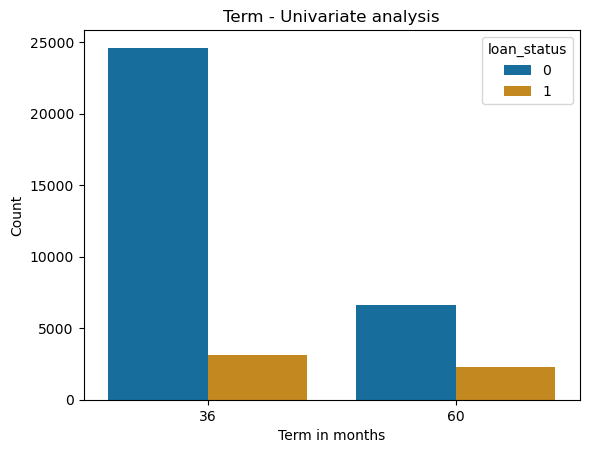

In [192]:
# Here there are several catgorical columns like term,grade,subgrade,emp_length,home_ownership,verification_status,loan_status,
# purpose,addr_state,pub_rec_bankruptcies
# Performing segmented univariate analysis based on loan status
ax = sbs.countplot(loan_ds,x='term',hue='loan_status')
ax.set_title("Term - Univariate analysis")
ax.set_xlabel("Term in months")
ax.set_ylabel("Count")
pyplot.show()

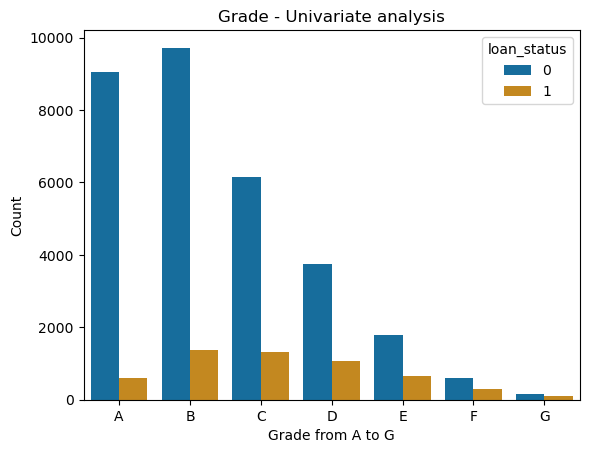

In [193]:
ax = sbs.countplot(loan_ds,x='grade',hue='loan_status',order=['A','B','C','D','E','F','G'])
ax.set_title("Grade - Univariate analysis")
ax.set_xlabel("Grade from A to G")
ax.set_ylabel("Count")
pyplot.show()

In [43]:
loan_ds['sub_grade'].value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

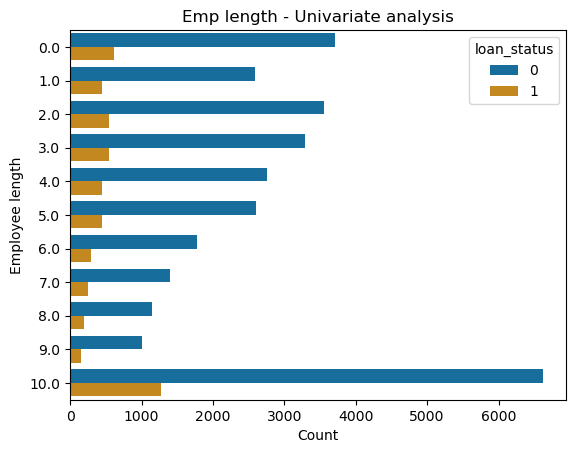

In [197]:
ax = sbs.countplot(loan_ds,y='emp_length',hue='loan_status')
ax.set_title("Emp length - Univariate analysis")
ax.set_xlabel("Count")
ax.set_ylabel("Employee length")
pyplot.show()

In [198]:
#replacing 'NONE' with 'OTHERS'
loan_ds['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)
ax = sbs.countplot(loan_ds,x='home_ownership',hue='loan_status')
ax.set_title("Home ownership - Univariate analysis")
ax.set_xlabel("Home ownership")
ax.set_ylabel("Count")
pyplot.show()

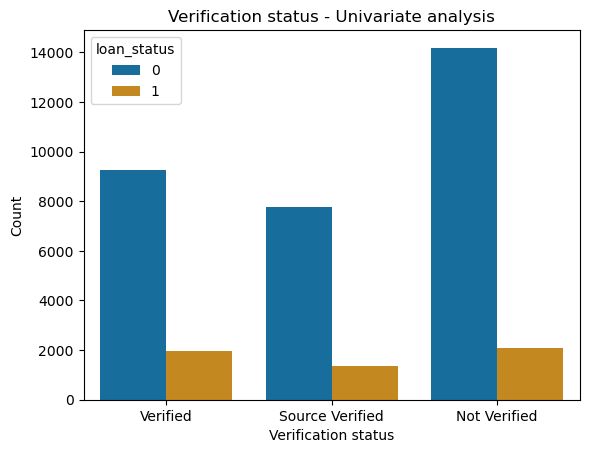

In [199]:
ax = sbs.countplot(loan_ds,x='verification_status',hue='loan_status')
ax.set_title("Verification status - Univariate analysis")
ax.set_xlabel("Verification status")
ax.set_ylabel("Count")
pyplot.show()

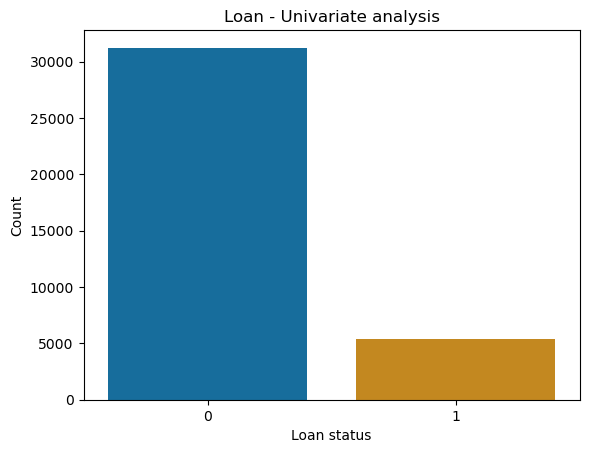

In [200]:
ax = sbs.countplot(loan_ds,x='loan_status')
ax.set_title("Loan - Univariate analysis")
ax.set_xlabel("Loan status")
ax.set_ylabel("Count")
pyplot.show()

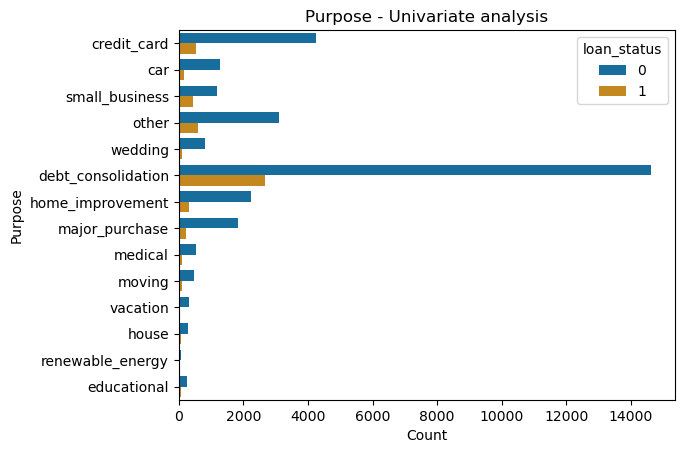

In [201]:
ax = sbs.countplot(loan_ds,y='purpose',hue='loan_status')
ax.set_title("Purpose - Univariate analysis")
ax.set_xlabel("Count")
ax.set_ylabel("Purpose")
pyplot.show()

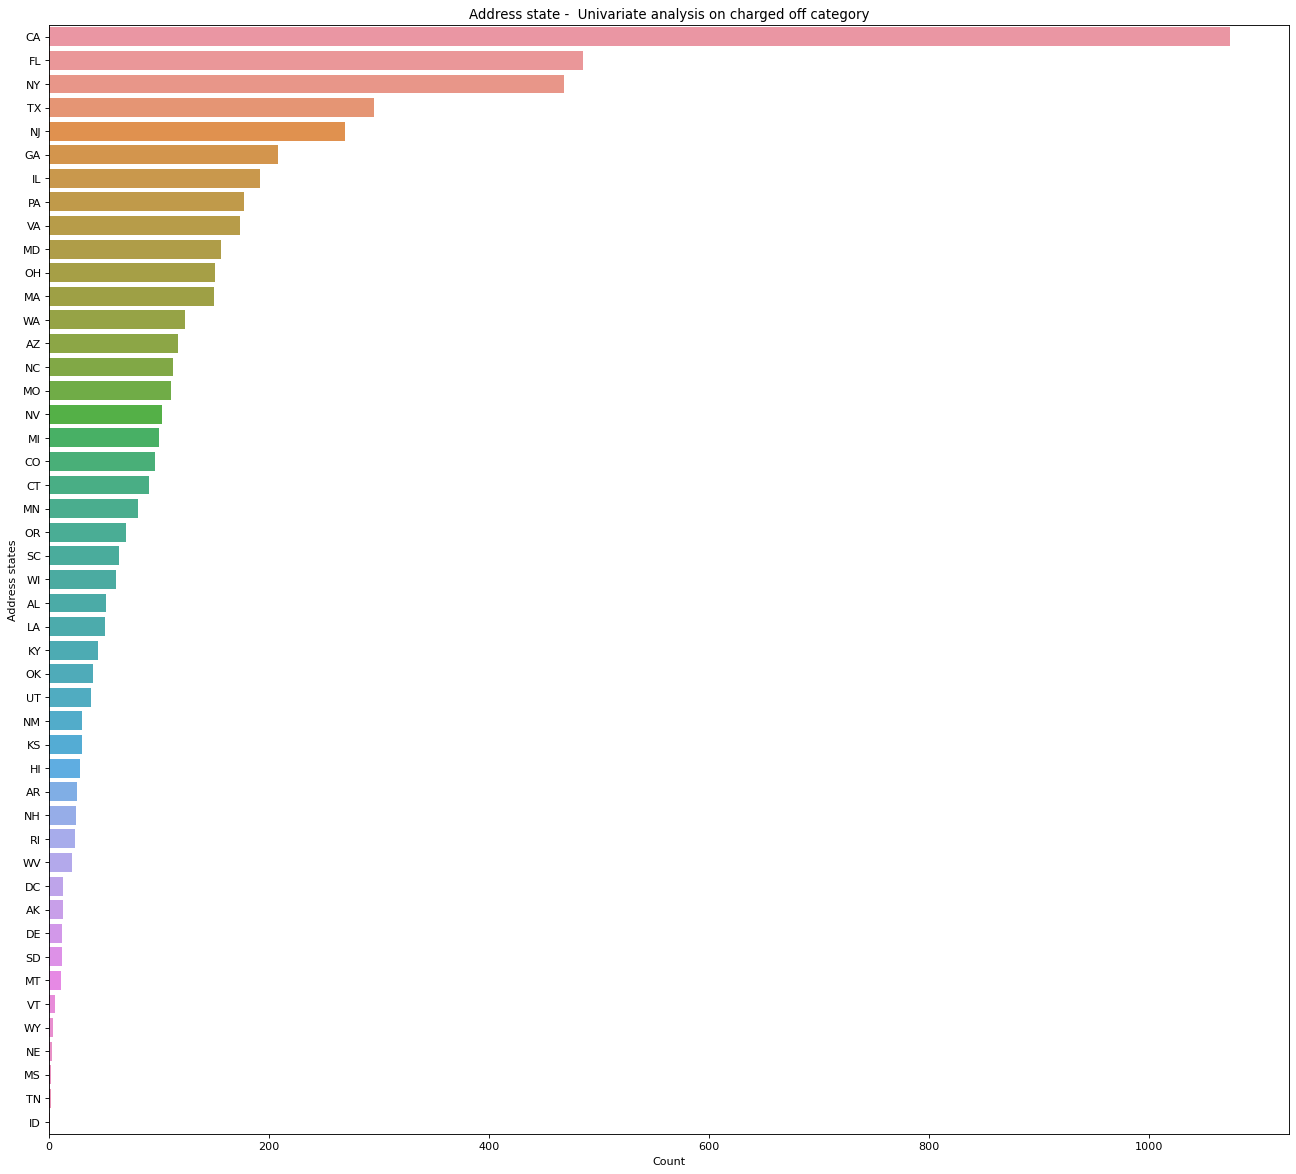

In [205]:
# Get only charged off values
loan_ds_charged_off = loan_ds[(loan_ds['loan_status']==1)]
figure(num=None, figsize=(20,18), dpi=80, facecolor='w', edgecolor='r')
ax = sbs.barplot( y=loan_ds_charged_off['addr_state'].value_counts().index, x=loan_ds_charged_off['addr_state'].value_counts())
ax.set_title("Address state -  Univariate analysis on charged off category")
ax.set_xlabel("Count")
ax.set_ylabel("Address states")
pyplot.show()

In [50]:
loan_ds['pub_rec_bankruptcies'].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

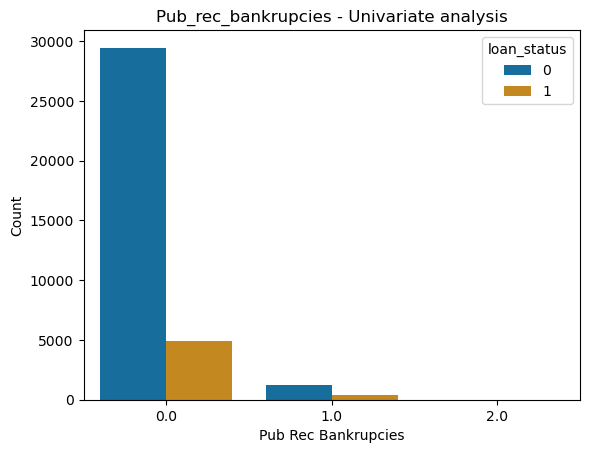

In [206]:
ax = sbs.countplot(loan_ds,x='pub_rec_bankruptcies',hue='loan_status')
ax.set_title("Pub_rec_bankrupcies - Univariate analysis")
ax.set_xlabel("Pub Rec Bankrupcies")
ax.set_ylabel("Count")
pyplot.show()

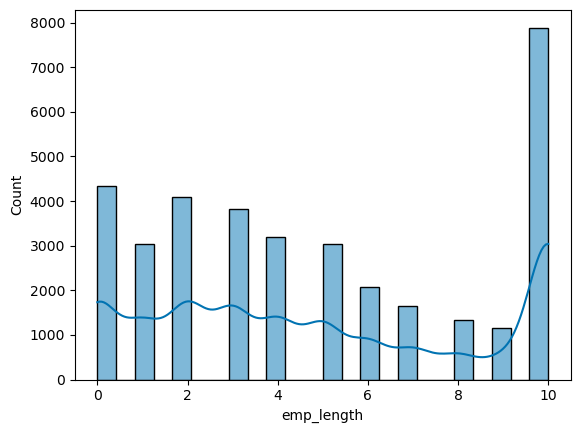

In [207]:
ax = sbs.histplot(loan_ds,x='emp_length', kde=True)
pyplot.show()

In [53]:
loan_ds.emp_length

0        10.0
1         0.0
2        10.0
3        10.0
5         3.0
         ... 
39712     4.0
39713     3.0
39714     0.0
39715     0.0
39716     0.0
Name: emp_length, Length: 38577, dtype: float64

In [54]:
loan_ds.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate grade sub_grade  \
0       5000         5000           4975.0    36     10.65     B        B2   
1       2500         2500           2500.0    60     15.27     C        C4   
2       2400         2400           2400.0    36     15.96     C        C5   
3      10000        10000          10000.0    36     13.49     C        C1   
5       5000         5000           5000.0    36      7.90     A        A4   

              emp_title  emp_length home_ownership  annual_inc  \
0                   NaN        10.0           RENT     24000.0   
1                 Ryder         0.0           RENT     30000.0   
2                   NaN        10.0           RENT     12252.0   
3   AIR RESOURCES BOARD        10.0           RENT     49200.0   
5  Veolia Transportaton         3.0           RENT     36000.0   

  verification_status issue_d  loan_status  \
0            Verified  Dec-11            0   
1     Source Verified  Dec-11            1   
2        Not Verified  Dec-11            0   
3     Source Verified  Dec-11            0   
5     Source Verified  Dec-11            0   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
5                                                NaN         wedding   

                                   title zip_code addr_state    dti  \
0                               Computer    860xx         AZ  27.65   
1                                   bike    309xx         GA   1.00   
2                   real estate business    606xx         IL   8.72   
3                               personel    917xx         CA  20.00   
5  My wedding loan I promise to pay back    852xx         AZ  11.20   

   pub_rec_bankruptcies  grade_num  
0                   0.0          2  
1                   0.0          3  
2                   0.0          3  
3                   0.0          3  
5                   0.0          1

In [55]:
loan_ds.shape

(38577, 22)

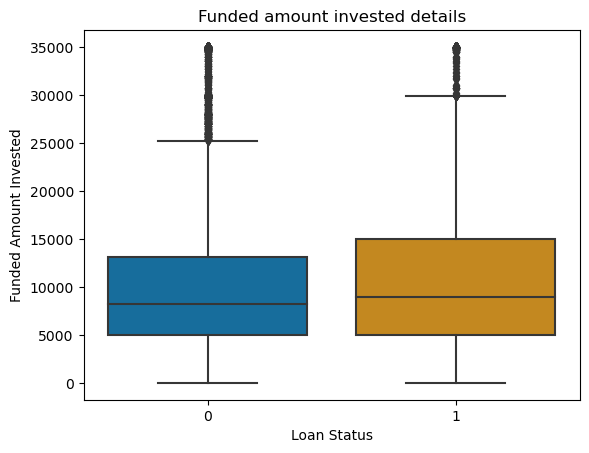

In [208]:
# funded_amnt_inv -> Amount invested by the investors
ax = sbs.boxplot(data=loan_ds, x="loan_status", y="funded_amnt_inv")
ax.set(xlabel = 'Loan Status', ylabel = 'Funded Amount Invested')
ax.set_title("Funded amount invested details")
pyplot.show()


In [57]:
# int_rate -> 
ax = sbs.boxplot(data=loan_ds, x="loan_status", y="int_rate")
ax.set(xlabel = 'Loan Status', ylabel = 'Interest Rate')
ax.set_title("Interest rest details")
pyplot.show()

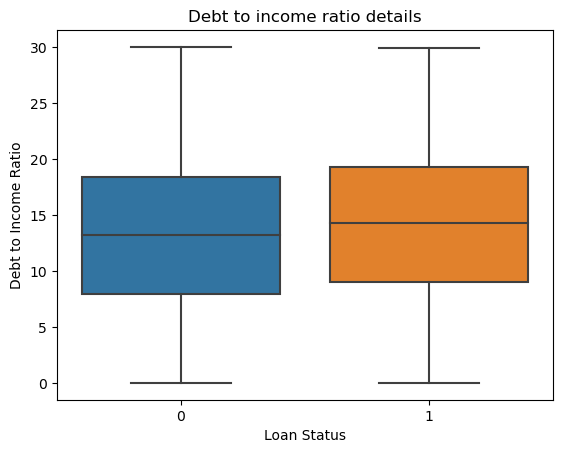

In [58]:
# dti -> 
ax = sbs.boxplot(data=loan_ds, x="loan_status", y="dti")
ax.set(xlabel = 'Loan Status', ylabel = 'Debt to Income Ratio')
ax.set_title("Debt to income ratio details")
pyplot.show()

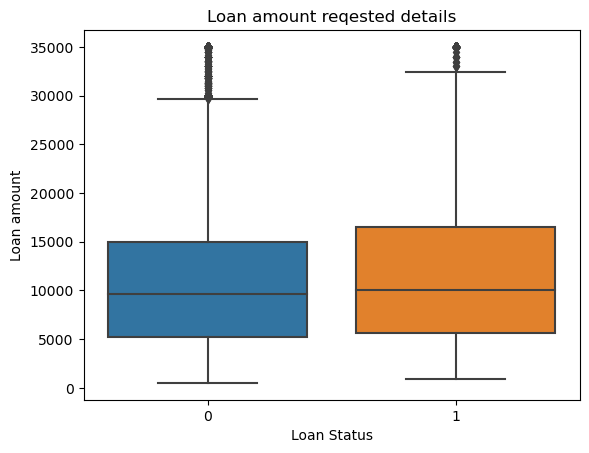

In [59]:
# Loan amount requested -> 
ax = sbs.boxplot(data=loan_ds, x="loan_status", y="loan_amnt")
ax.set(xlabel = 'Loan Status', ylabel = 'Loan amount')
ax.set_title("Loan amount reqested details")
pyplot.show()

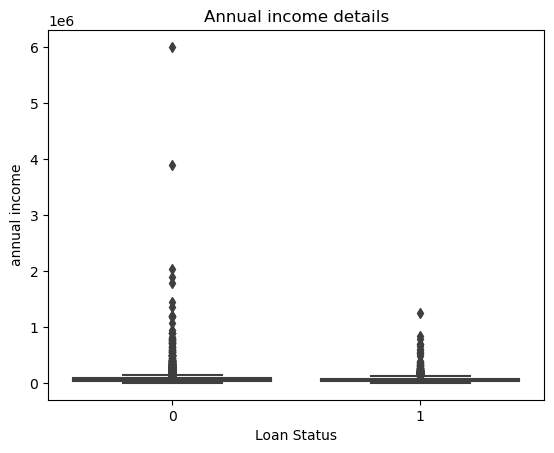

In [60]:
ax = sbs.boxplot(data=loan_ds, x="loan_status", y="annual_inc")
ax.set(xlabel = 'Loan Status', ylabel = 'annual income')
ax.set_title("Annual income details")
pyplot.show()

In [62]:
#Clearly indincating the presence of outliers.
#So, Removing them.
#Let's see the quantile info and take an appropriate action.
#The values after 95 percentile seems to be disconected from the general distribution and 
#also there is huge increase in the value for small quantile variation.
#So, considering threshold for removing outliers as 0.95

In [63]:
quantile_info = loan_ds.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [64]:
per_95_annual_inc = loan_ds['annual_inc'].quantile(0.95)
loan_ds = loan_ds[loan_ds.annual_inc <= per_95_annual_inc]

In [77]:
ax = sbs.boxplot(data=loan_ds, x="loan_status", y="annual_inc")
ax.set(xlabel = 'Loan Status', ylabel = 'annual income')
ax.set_title("Annual income details")
pyplot.show()

In [74]:
loan_ds.sub_grade = pd.to_numeric(loan_ds.sub_grade.apply(lambda x : x[-1]))
loan_ds.sub_grade.head()


0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

In [75]:
loan_ds.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate grade  sub_grade  \
0       5000         5000           4975.0    36     10.65     B          2   
1       2500         2500           2500.0    60     15.27     C          4   
2       2400         2400           2400.0    36     15.96     C          5   
3      10000        10000          10000.0    36     13.49     C          1   
5       5000         5000           5000.0    36      7.90     A          4   

              emp_title  emp_length home_ownership  annual_inc  \
0                   NaN        10.0           RENT     24000.0   
1                 Ryder         0.0           RENT     30000.0   
2                   NaN        10.0           RENT     12252.0   
3   AIR RESOURCES BOARD        10.0           RENT     49200.0   
5  Veolia Transportaton         3.0           RENT     36000.0   

  verification_status issue_d  loan_status  \
0            Verified  Dec-11            0   
1     Source Verified  Dec-11            1   
2        Not Verified  Dec-11            0   
3     Source Verified  Dec-11            0   
5     Source Verified  Dec-11            0   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
5                                                NaN         wedding   

                                   title zip_code addr_state    dti  \
0                               Computer    860xx         AZ  27.65   
1                                   bike    309xx         GA   1.00   
2                   real estate business    606xx         IL   8.72   
3                               personel    917xx         CA  20.00   
5  My wedding loan I promise to pay back    852xx         AZ  11.20   

   pub_rec_bankruptcies  grade_num  
0                   0.0          2  
1                   0.0          3  
2                   0.0          3  
3                   0.0          3  
5                   0.0          1

<Axes: title={'center': 'Univariate - Sub grade distribution details'}, xlabel='grade', ylabel='count'>

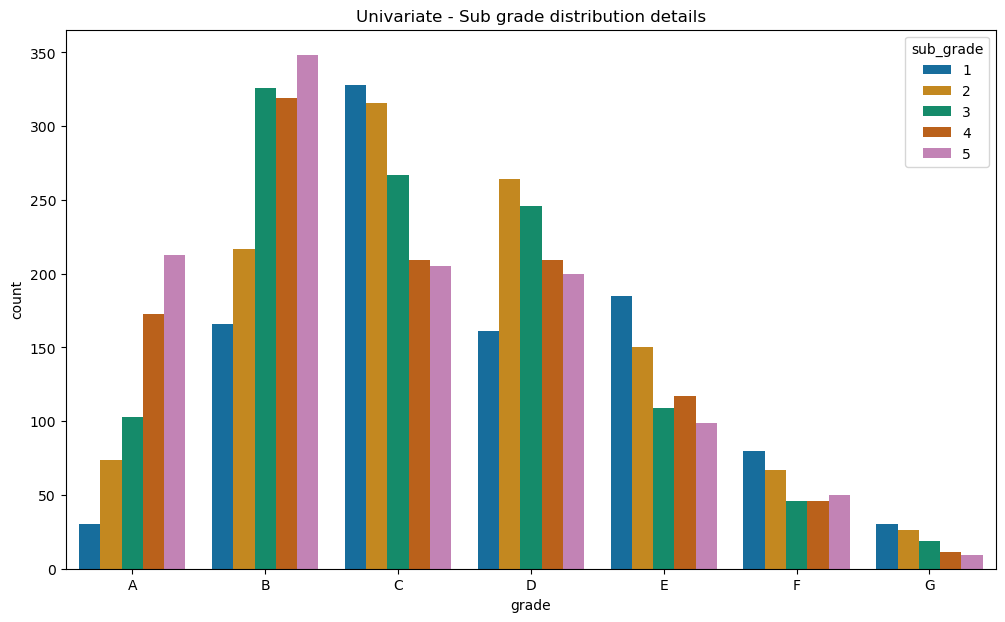

In [209]:
fig, ax = pyplot.subplots(figsize=(12,7))
sbs.set_palette('colorblind')
ax.set_title("Univariate - Sub grade distribution details")
ax.set_xlabel("Sub grade grouping")
sbs.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_ds[loan_ds.loan_status == 1])
pyplot.show()

In [82]:
#Creating bins for some numerical variable to make them categorical
loan_ds['int_rate'].describe()

count    36654.000000
mean        11.888080
std          3.667257
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

In [83]:
loan_ds['annual_inc'].describe()

count     36654.000000
mean      60855.751621
std       27750.284125
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77970.500000
max      140004.000000
Name: annual_inc, dtype: float64

In [84]:
loan_ds['int_rate_groups'] = pd.cut(loan_ds['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-25%'])
loan_ds['annual_inc_groups'] = pd.cut(loan_ds['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [85]:
# Viewing new bins created
loan_ds.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate grade  sub_grade  \
0       5000         5000           4975.0    36     10.65     B          2   
1       2500         2500           2500.0    60     15.27     C          4   
2       2400         2400           2400.0    36     15.96     C          5   
3      10000        10000          10000.0    36     13.49     C          1   
5       5000         5000           5000.0    36      7.90     A          4   

              emp_title  emp_length home_ownership  annual_inc  \
0                   NaN        10.0           RENT     24000.0   
1                 Ryder         0.0           RENT     30000.0   
2                   NaN        10.0           RENT     12252.0   
3   AIR RESOURCES BOARD        10.0           RENT     49200.0   
5  Veolia Transportaton         3.0           RENT     36000.0   

  verification_status issue_d  loan_status  \
0            Verified  Dec-11            0   
1     Source Verified  Dec-11            1   
2        Not Verified  Dec-11            0   
3     Source Verified  Dec-11            0   
5     Source Verified  Dec-11            0   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
5                                                NaN         wedding   

                                   title zip_code addr_state    dti  \
0                               Computer    860xx         AZ  27.65   
1                                   bike    309xx         GA   1.00   
2                   real estate business    606xx         IL   8.72   
3                               personel    917xx         CA  20.00   
5  My wedding loan I promise to pay back    852xx         AZ  11.20   

   pub_rec_bankruptcies  grade_num int_rate_groups annual_inc_groups  
0                   0.0          2          9%-13%            3k-31k  
1                   0.0          3         13%-17%            3k-31k  
2                   0.0          3         13%-17%            3k-31k  
3                   0.0          3         13%-17%           31k-58k  
5                   0.0          1           5%-9%           31k-58k

In [ ]:
loan_ds.shape

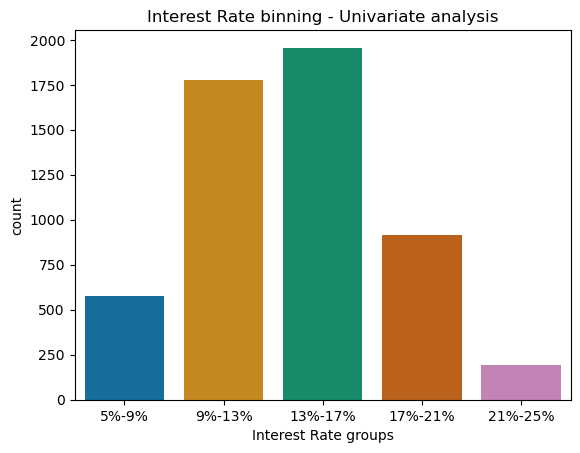

In [217]:
#Analyzing interest rate wrt the interest rate bins created
ax = sbs.countplot(x='int_rate_groups', data=loan_ds[loan_ds.loan_status == 1])
ax.set_title("Interest Rate binning - Univariate analysis")
ax.set_xlabel('Interest Rate groups')
pyplot.show()

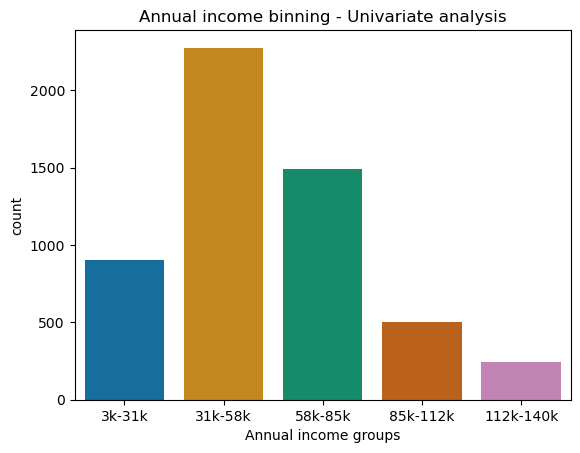

In [216]:
#Similarly analyzing annual_inc group
ax = sbs.countplot(x='annual_inc_groups', data=loan_ds[loan_ds.loan_status == 1])
ax.set_title("Annual income binning - Univariate analysis")
ax.set_xlabel('Annual income groups')
pyplot.show()

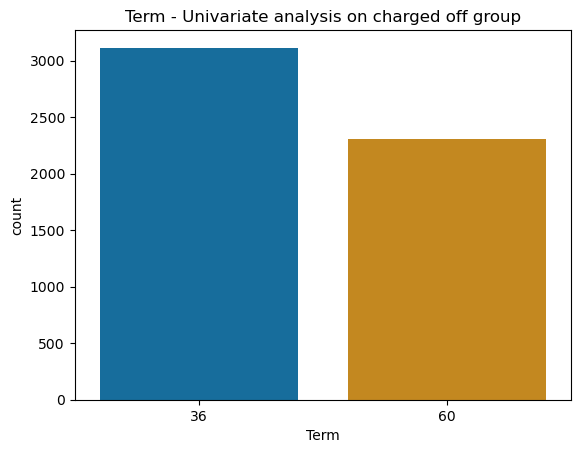

In [219]:
ax = sbs.countplot(x='term', data=loan_ds[loan_ds['loan_status']==1])
ax.set_title("Term - Univariate analysis on charged off group")
ax.set_xlabel("Term")
pyplot.show()

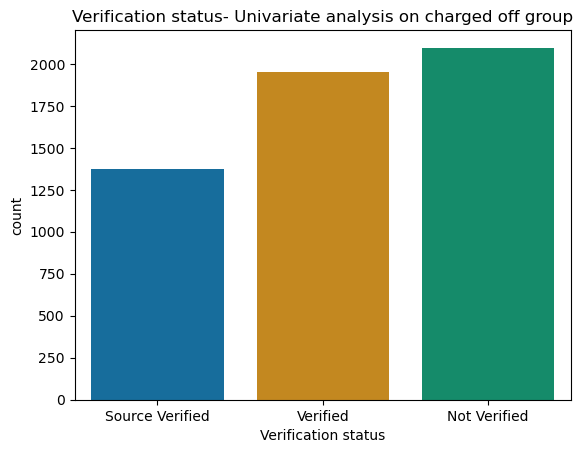

In [224]:
ax = sbs.countplot(x='verification_status', data=loan_ds[loan_ds['loan_status']==1])
ax.set_title("Verification status- Univariate analysis on charged off group")
ax.set_xlabel("Verification status")
pyplot.show()

In [ ]:
# Not verified have max no. of defaulting

In [ ]:
# By Issued Month and Year 

In [225]:
## Extracting month and year
df_month_year = loan_ds['issue_d'].str.partition("-", True)     
loan_ds['issue_month']=df_month_year[0]                       
loan_ds['issue_year']='20' + df_month_year[2]

In [226]:
loan_ds.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate grade  sub_grade  \
0       5000         5000           4975.0    36     10.65     B          2   
1       2500         2500           2500.0    60     15.27     C          4   
2       2400         2400           2400.0    36     15.96     C          5   
3      10000        10000          10000.0    36     13.49     C          1   
5       5000         5000           5000.0    36      7.90     A          4   

              emp_title  emp_length home_ownership  annual_inc  \
0                   NaN        10.0           RENT     24000.0   
1                 Ryder         0.0           RENT     30000.0   
2                   NaN        10.0           RENT     12252.0   
3   AIR RESOURCES BOARD        10.0           RENT     49200.0   
5  Veolia Transportaton         3.0           RENT     36000.0   

  verification_status issue_d  loan_status  \
0            Verified  Dec-11            0   
1     Source Verified  Dec-11            1   
2        Not Verified  Dec-11            0   
3     Source Verified  Dec-11            0   
5     Source Verified  Dec-11            0   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
5                                                NaN         wedding   

                                   title zip_code addr_state    dti  \
0                               Computer    860xx         AZ  27.65   
1                                   bike    309xx         GA   1.00   
2                   real estate business    606xx         IL   8.72   
3                               personel    917xx         CA  20.00   
5  My wedding loan I promise to pay back    852xx         AZ  11.20   

   pub_rec_bankruptcies  grade_num int_rate_groups annual_inc_groups  \
0                   0.0          2          9%-13%            3k-31k   
1                   0.0          3         13%-17%            3k-31k   
2                   0.0          3         13%-17%            3k-31k   
3                   0.0          3         13%-17%           31k-58k   
5                   0.0          1           5%-9%           31k-58k   

  issue_month issue_year funded_amnt_inv_group dti_group  
0         Dec       2011                  0-5k     25-30  
1         Dec       2011                  0-5k       0-5  
2         Dec       2011                  0-5k      5-10  
3         Dec       2011                5k-10k     20-25  
5         Dec       2011                  0-5k     10-15

In [227]:
loan_ds.shape

(36654, 28)

In [231]:
pyplot.figure(figsize=(15,15))
pyplot.subplot(221)
ax = sbs.countplot(x='issue_month', data=loan_ds[loan_ds['loan_status']==1])
ax.set_title("Issue month - Univariate analysis for charged off group")
ax.set_xlabel("Issue Month")
pyplot.subplot(222)
ax1= sbs.countplot(x='issue_year', data=loan_ds[loan_ds['loan_status']==1])
ax1.set_title("Issue year - Univariate analysis for charged off group")
ax1.set_xlabel("Issue year")
pyplot.show()

In [ ]:
# Maximum number of defaults are present when loan was sanctioned in Dec month
# And in the year 2011 maximum loan defaulters when comparing to other years

In [232]:
#Analyzing funded_amnt_inv, dti
loan_ds['funded_amnt_inv'].describe()

count    36654.000000
mean      9894.181349
std       6730.756232
min          0.000000
25%       4975.000000
50%       8375.000000
75%      13623.731415
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [233]:
loan_ds['dti'].describe()

count    36654.000000
mean        13.446725
std          6.661899
min          0.000000
25%          8.350000
50%         13.580000
75%         18.710000
max         29.990000
Name: dti, dtype: float64

In [234]:
loan_ds['funded_amnt_inv_group'] = pd.cut(loan_ds['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) #
loan_ds['dti_group'] = pd.cut(loan_ds['dti'], bins=6,labels=['0-5','5-10','10-15','15-20','20-25','25-30']) 

In [235]:
# Viewing new bins created
loan_ds.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate grade  sub_grade  \
0       5000         5000           4975.0    36     10.65     B          2   
1       2500         2500           2500.0    60     15.27     C          4   
2       2400         2400           2400.0    36     15.96     C          5   
3      10000        10000          10000.0    36     13.49     C          1   
5       5000         5000           5000.0    36      7.90     A          4   

              emp_title  emp_length home_ownership  annual_inc  \
0                   NaN        10.0           RENT     24000.0   
1                 Ryder         0.0           RENT     30000.0   
2                   NaN        10.0           RENT     12252.0   
3   AIR RESOURCES BOARD        10.0           RENT     49200.0   
5  Veolia Transportaton         3.0           RENT     36000.0   

  verification_status issue_d  loan_status  \
0            Verified  Dec-11            0   
1     Source Verified  Dec-11            1   
2        Not Verified  Dec-11            0   
3     Source Verified  Dec-11            0   
5     Source Verified  Dec-11            0   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
5                                                NaN         wedding   

                                   title zip_code addr_state    dti  \
0                               Computer    860xx         AZ  27.65   
1                                   bike    309xx         GA   1.00   
2                   real estate business    606xx         IL   8.72   
3                               personel    917xx         CA  20.00   
5  My wedding loan I promise to pay back    852xx         AZ  11.20   

   pub_rec_bankruptcies  grade_num int_rate_groups annual_inc_groups  \
0                   0.0          2          9%-13%            3k-31k   
1                   0.0          3         13%-17%            3k-31k   
2                   0.0          3         13%-17%            3k-31k   
3                   0.0          3         13%-17%           31k-58k   
5                   0.0          1           5%-9%           31k-58k   

  issue_month issue_year funded_amnt_inv_group dti_group  
0         Dec       2011                  0-5k     25-30  
1         Dec       2011                  0-5k       0-5  
2         Dec       2011                  0-5k      5-10  
3         Dec       2011                5k-10k     20-25  
5         Dec       2011                  0-5k     10-15

In [236]:
loan_ds.shape

(36654, 28)

In [237]:
ax = sbs.countplot(x='funded_amnt_inv_group', data=loan_ds[loan_ds['loan_status']==1])
ax.set_yscale('log')
ax.set_title("Funded amount inv binning - Univariate analysis for charged off group")
ax.set_xlabel("Funded amount inv binning group")
pyplot.show()

In [238]:
loan_ds.corr()

C:\Users\I349261\AppData\Local\Temp\ipykernel_43668\3362182652.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_ds.corr()


loan_amnt  funded_amnt  funded_amnt_inv      term  \
loan_amnt              1.000000     0.981942         0.936925  0.349710   
funded_amnt            0.981942     1.000000         0.954850  0.328898   
funded_amnt_inv        0.936925     0.954850         1.000000  0.348494   
term                   0.349710     0.328898         0.348494  1.000000   
int_rate               0.291189     0.296182         0.288787  0.435568   
sub_grade              0.031461     0.024139         0.025359  0.012954   
emp_length             0.150941     0.150596         0.161920  0.107621   
annual_inc             0.403197     0.399030         0.382429  0.080212   
loan_status            0.066771     0.064210         0.044927  0.176107   
dti                    0.090313     0.089510         0.097070  0.078732   
pub_rec_bankruptcies  -0.029698    -0.030696        -0.035393  0.016659   
grade_num              0.277223     0.279538         0.255140  0.424350   

                      int_rate  sub_grade  emp_length  annual_inc  \
loan_amnt             0.291189   0.031461    0.150941    0.403197   
funded_amnt           0.296182   0.024139    0.150596    0.399030   
funded_amnt_inv       0.288787   0.025359    0.161920    0.382429   
term                  0.435568   0.012954    0.107621    0.080212   
int_rate              1.000000  -0.027863   -0.002344    0.054022   
sub_grade            -0.027863   1.000000   -0.013215    0.009193   
emp_length           -0.002344  -0.013215    1.000000    0.195530   
annual_inc            0.054022   0.009193    0.195530    1.000000   
loan_status           0.212342  -0.001136    0.018058   -0.066246   
dti                   0.111683   0.018002    0.058352   -0.072641   
pub_rec_bankruptcies  0.087167   0.003451    0.066796   -0.005844   
grade_num             0.947594  -0.197681   -0.002299    0.060538   

                      loan_status       dti  pub_rec_bankruptcies  grade_num  
loan_amnt                0.066771  0.090313             -0.029698   0.277223  
funded_amnt              0.064210  0.089510             -0.030696   0.279538  
funded_amnt_inv          0.044927  0.097070             -0.035393   0.255140  
term                     0.176107  0.078732              0.016659   0.424350  
int_rate                 0.212342  0.111683              0.087167   0.947594  
sub_grade               -0.001136  0.018002              0.003451  -0.197681  
emp_length               0.018058  0.058352              0.066796  -0.002299  
annual_inc              -0.066246 -0.072641             -0.005844   0.060538  
loan_status              1.000000  0.041203              0.048317   0.201773  
dti                      0.041203  1.000000              0.003936   0.096389  
pub_rec_bankruptcies     0.048317  0.003936              1.000000   0.082090  
grade_num                0.201773  0.096389              0.082090   1.000000

In [ ]:
#Loan_amnt and funded_amnt_inv are positively correlated

In [239]:
ax = sbs.countplot(x='dti_group', data=loan_ds[loan_ds['loan_status']==1])
ax.set_title("DTI binning - Univariate analysis for charged off group")
ax.set_xlabel("DTI binnning group")
pyplot.show()

##### Observations from univariate analysis

##### The above analysis with respect to the charged off loans for each variable suggests the following. 
##### There is a more probability of defaulting when : 

##### - Applicants having house_ownership as 'RENT'
##### - Applicants who use the loan to clear other debts
##### - Applicants who receive interest at the rate of 13-17%
##### - Applicants who have an income of range 31201 - 58402
##### - Applicants with employement length of 10
##### - When funded amount by investor is between 5000-10000
##### - Dti is between 10-20
##### - Term of 36 months
##### - When the loan status is Not verified 
##### - When the purpose is 'debt_consolidation' Grade is 'B' And a total grade of 'B5' level.
##### -  when from CA,FL address state 
##### -   Applied in the month of Dec and year 2011 had max defaulting

##### Bivariate analysis

In [ ]:
#1.Annual income vs loan purpose

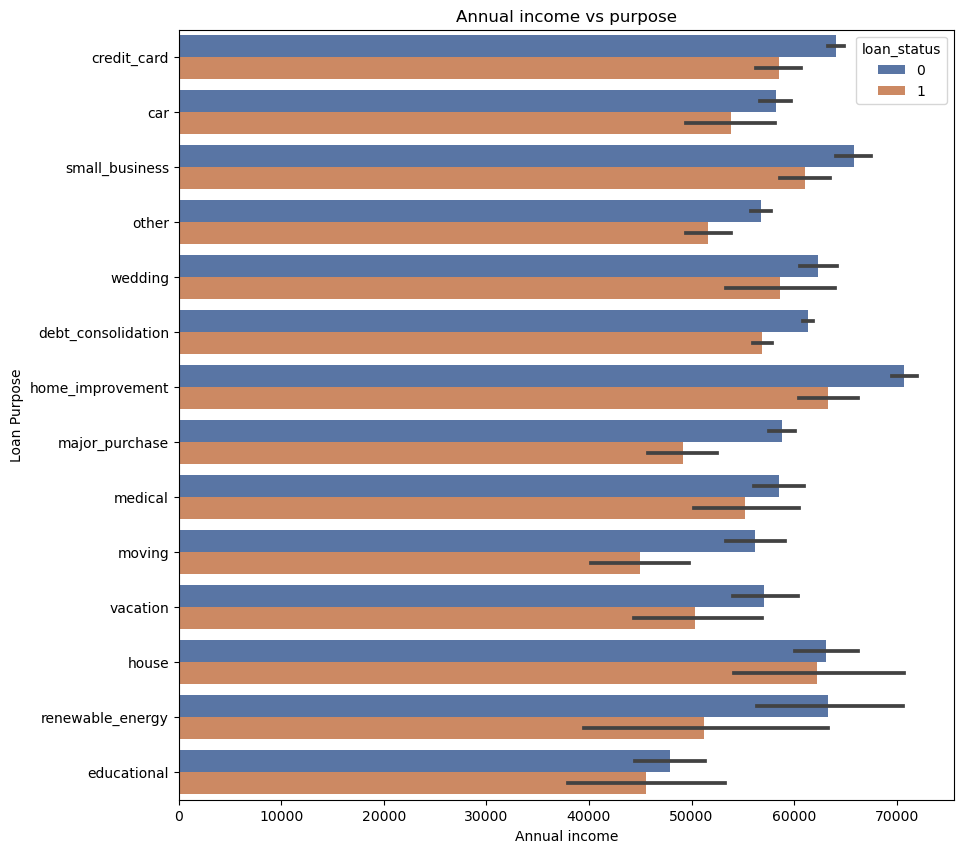

In [242]:
pyplot.figure(figsize=(10,10))
ax = sbs.barplot(data =loan_ds,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
ax.set_title("Annual income vs purpose")
ax.set_xlabel("Annual income")
ax.set_ylabel("Loan Purpose")
pyplot.show()

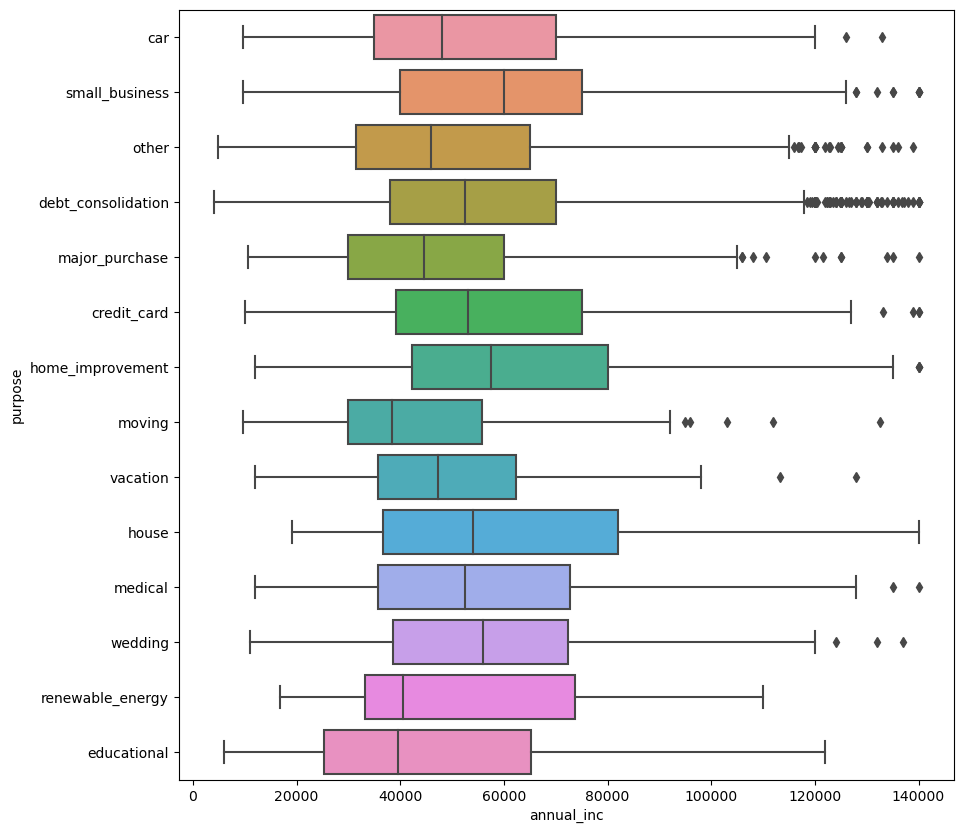

In [243]:
pyplot.figure(figsize=(10,10))
sbs.boxplot(data =loan_ds[(loan_ds['loan_status']==1)],x='annual_inc', y='purpose')
ax.set_title("Annual income vs purpose in box plot")
ax.set_xlabel("Annual income")
ax.set_ylabel("Loan Purpose")
pyplot.show()

In [ ]:
### Though the number of loans applied and defaulted are the highest in number for "debt_consolation", 
#the annual income of those who applied isn't the highest. 
#- Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and 
#"small_businesses"
# Applicants with lower salary applied for educational loan

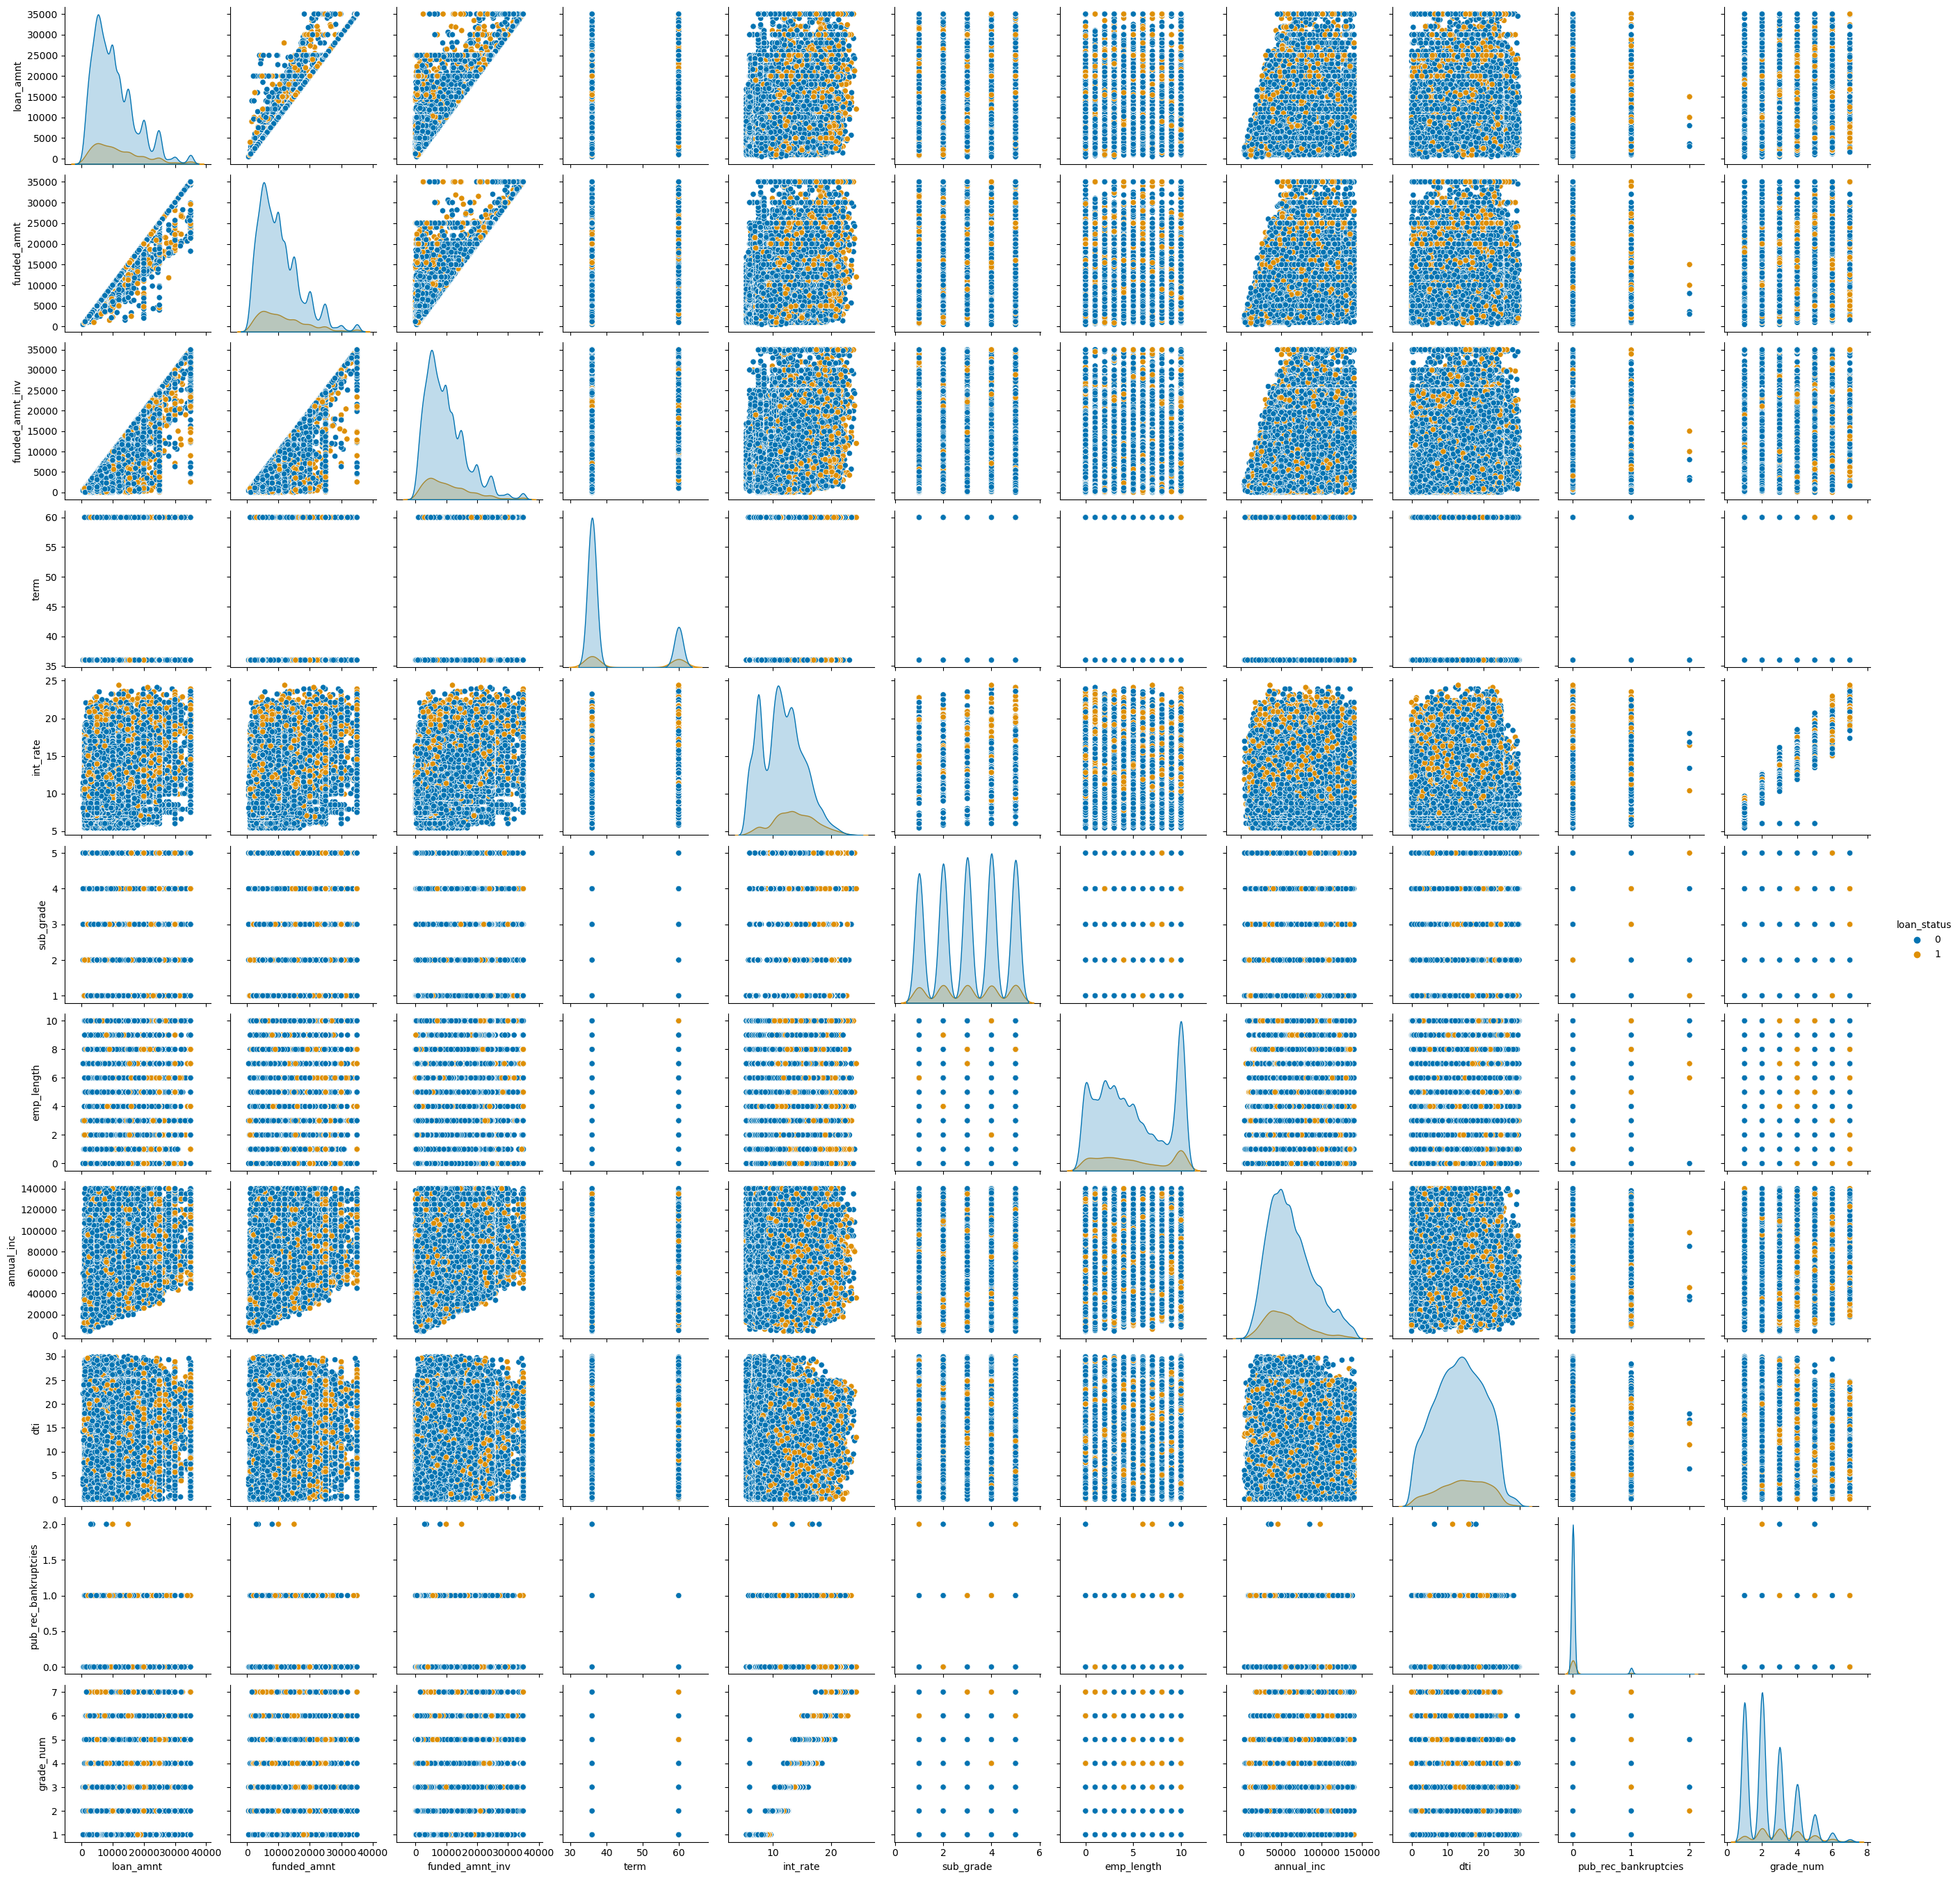

In [244]:
# Find relationship between all numerical variables
ax = sbs.pairplot(loan_ds,hue='loan_status')
ax.set_title("Pair plotting to find the corrrelation between the variables")

In [ ]:
#### 2.Annual income vs home ownership

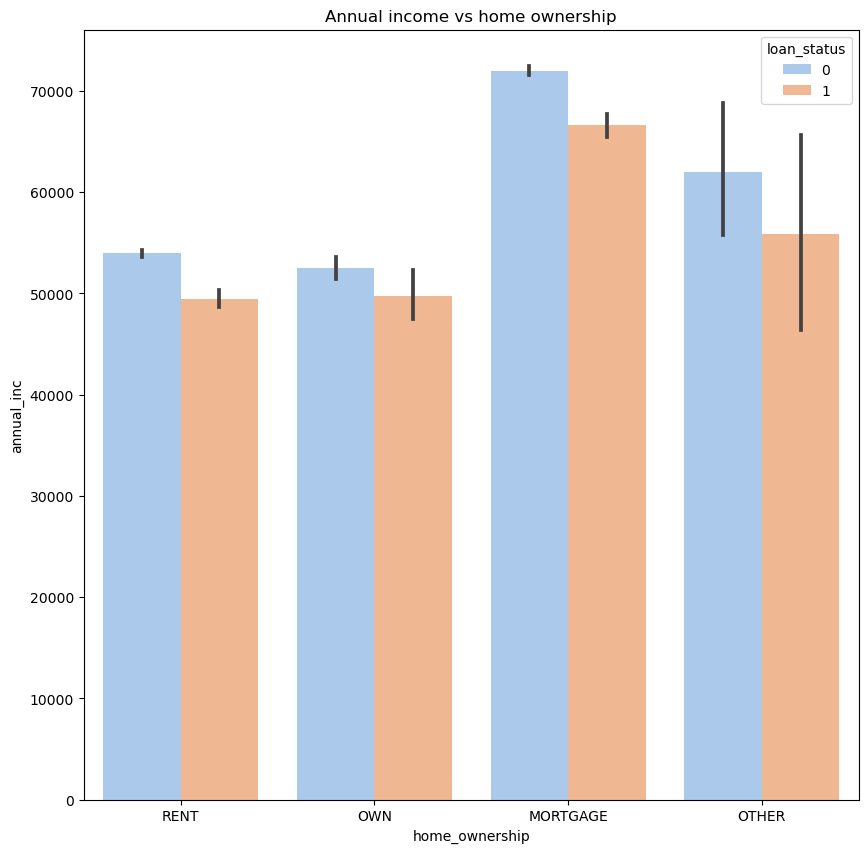

In [248]:
pyplot.figure(figsize=(10,10))
ax = sbs.barplot(data =loan_ds,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
ax.set_title("Annual income vs home ownership")
pyplot.show()

In [ ]:
### Annual Income vs Loan amount

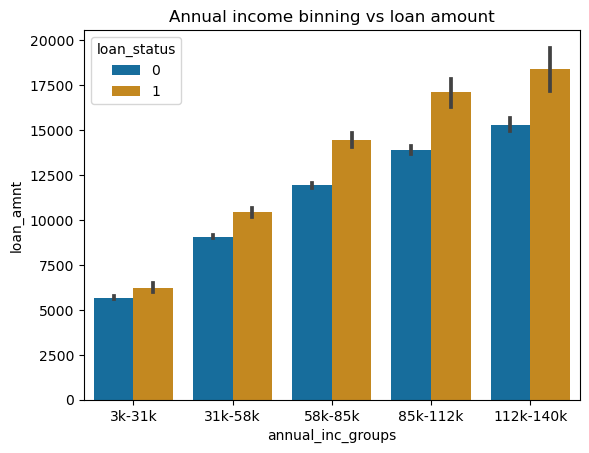

In [249]:
ax = sbs.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = loan_ds)
ax.set_title("Annual income binning vs loan amount")
pyplot.show()

In [250]:
### Annual Income vs funded amount inv
ax = sbs.barplot(x = "annual_inc_groups", y = "funded_amnt_inv", hue = 'loan_status', data = loan_ds)
ax.set_title("Annual income binning vs funded amount invested")
pyplot.show()

In [ ]:
# Loan amount higher the defaulting is higher

In [252]:
# 3. Annual income vs int_rate
pyplot.figure(figsize=(10,10))
ax = sbs.barplot(data =loan_ds,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
ax.set_title("Interest rate binning vs annual income")
ax.set_xlabel("Interest Rate groups")
ax.set_ylabel("Annual income")
pyplot.show()

In [ ]:
# Irrespective of the annual income , the defaulting is higher in higher interest rate group 21-25%

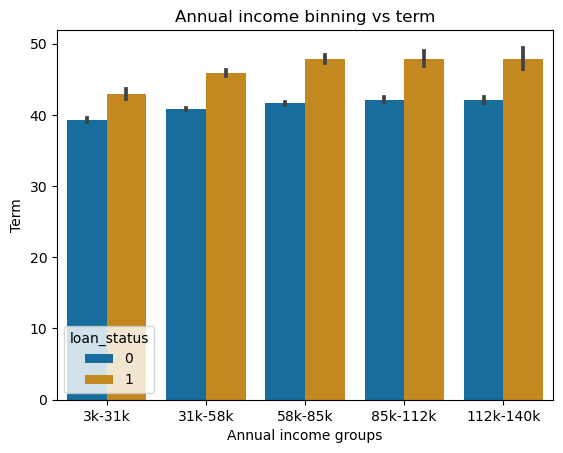

In [253]:
### Annual Income vs term
ax = sbs.barplot(x = "annual_inc_groups", y = "term", hue = 'loan_status', data = loan_ds)
ax.set_title("Annual income binning vs term")
ax.set_xlabel("Annual income groups")
ax.set_ylabel("Term")
pyplot.show()

In [ ]:
# annual income vs term: with higher term the defaulting seems to increase

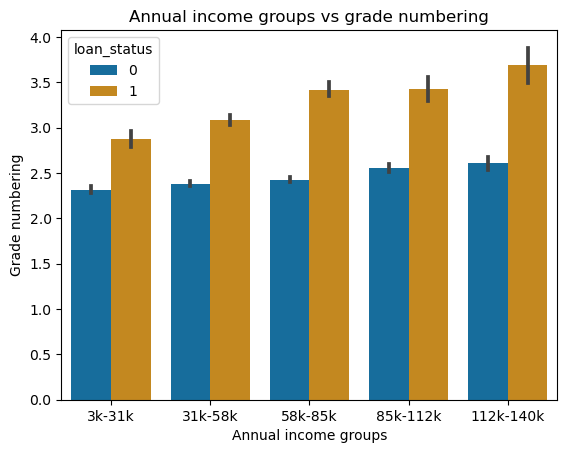

In [254]:
### Annual Income vs grade
ax = sbs.barplot(x = "annual_inc_groups", y = "grade_num", hue = 'loan_status', data = loan_ds)
ax.set_title("Annual income groups vs grade numbering")
ax.set_xlabel("Annual income groups")
ax.set_ylabel("Grade numbering")
pyplot.show()

In [ ]:
#annual income vs grade: irrspective of the annual income as the grade increases the defauling increases

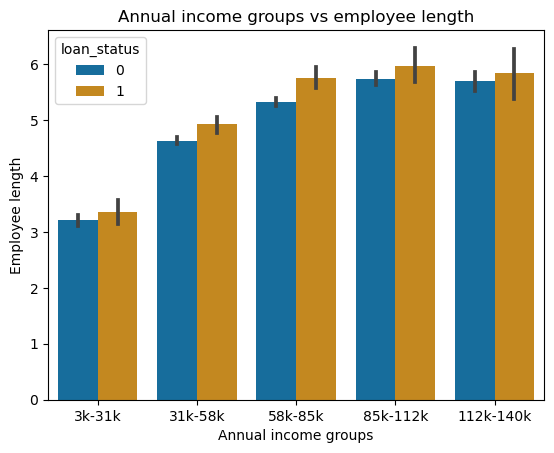

In [258]:
### Annual Income vs emp lenght
ax = sbs.barplot(x = "annual_inc_groups", y = "emp_length", hue = 'loan_status', data = loan_ds)
ax.set_title("Annual income groups vs employee length")
ax.set_xlabel("Annual income groups")
ax.set_ylabel("Employee length")
pyplot.show()

In [ ]:
#annual income vs emp_length: annual income increases as emp length increases also ppl with higher income tend to default more

In [ ]:
## Analysing loan_amount with other columns for more insights 

In [ ]:
#### 1.funded_amnt_inv_group vs Interest Rate

In [259]:
pyplot.figure(figsize=(10,10))
ax = sbs.barplot(data =loan_ds,x='funded_amnt_inv_group', y='int_rate', hue ='loan_status',palette="pastel")
ax.set_title("Funded amount invested group vs interest rate")
ax.set_xlabel("Funded amount invested groups")
ax.set_ylabel("Interest Rate")
pyplot.show()

In [ ]:
#funded_amnt_inv vs interest rate: Interest rate increases with funded_amnt_inv and higher interest more defaulting	 

In [ ]:
#### 2.Funded Amount vs Loan purpose

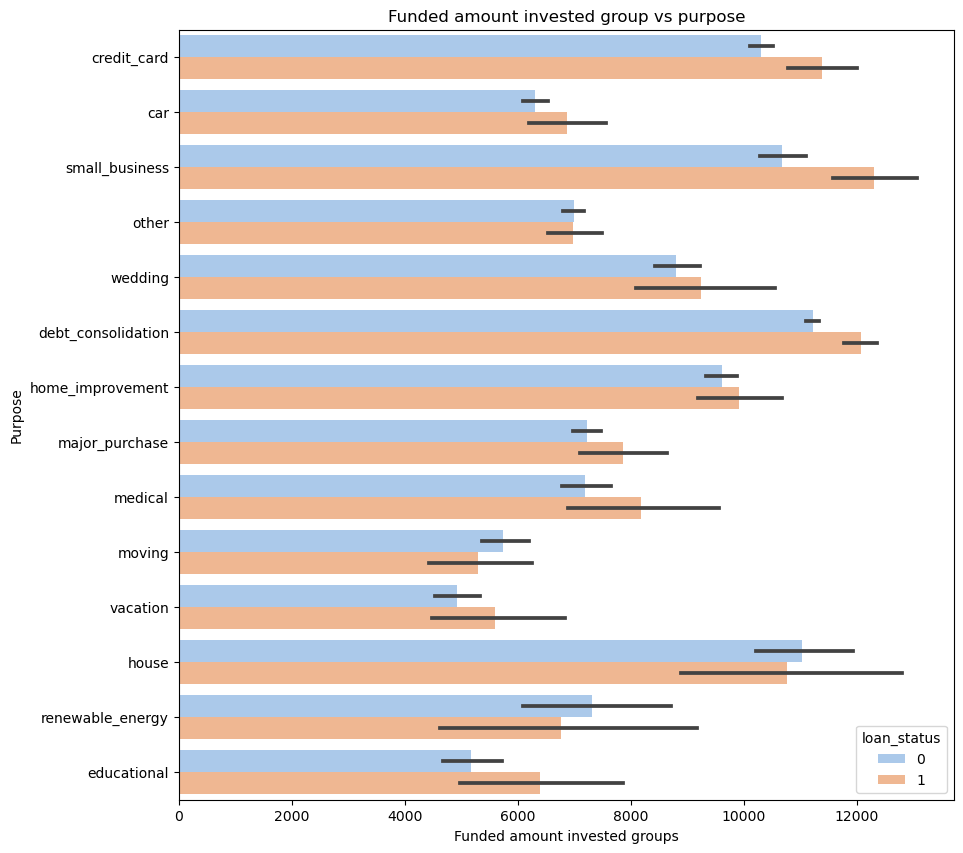

In [260]:
pyplot.figure(figsize=(10,10))
ax = sbs.barplot(data =loan_ds,x='funded_amnt_inv', y='purpose', hue ='loan_status',palette="pastel")
ax.set_title("Funded amount invested group vs purpose")
ax.set_xlabel("Funded amount invested groups")
ax.set_ylabel("Purpose")
pyplot.show()

In [ ]:
# Funded amnt inv V/s purpose: In the lower segment below 7k defaulting is more for education loan and vacation
# and in higher amount it is more for small business, debt consoliation and credit card

In [ ]:
##Purpose vs Grade

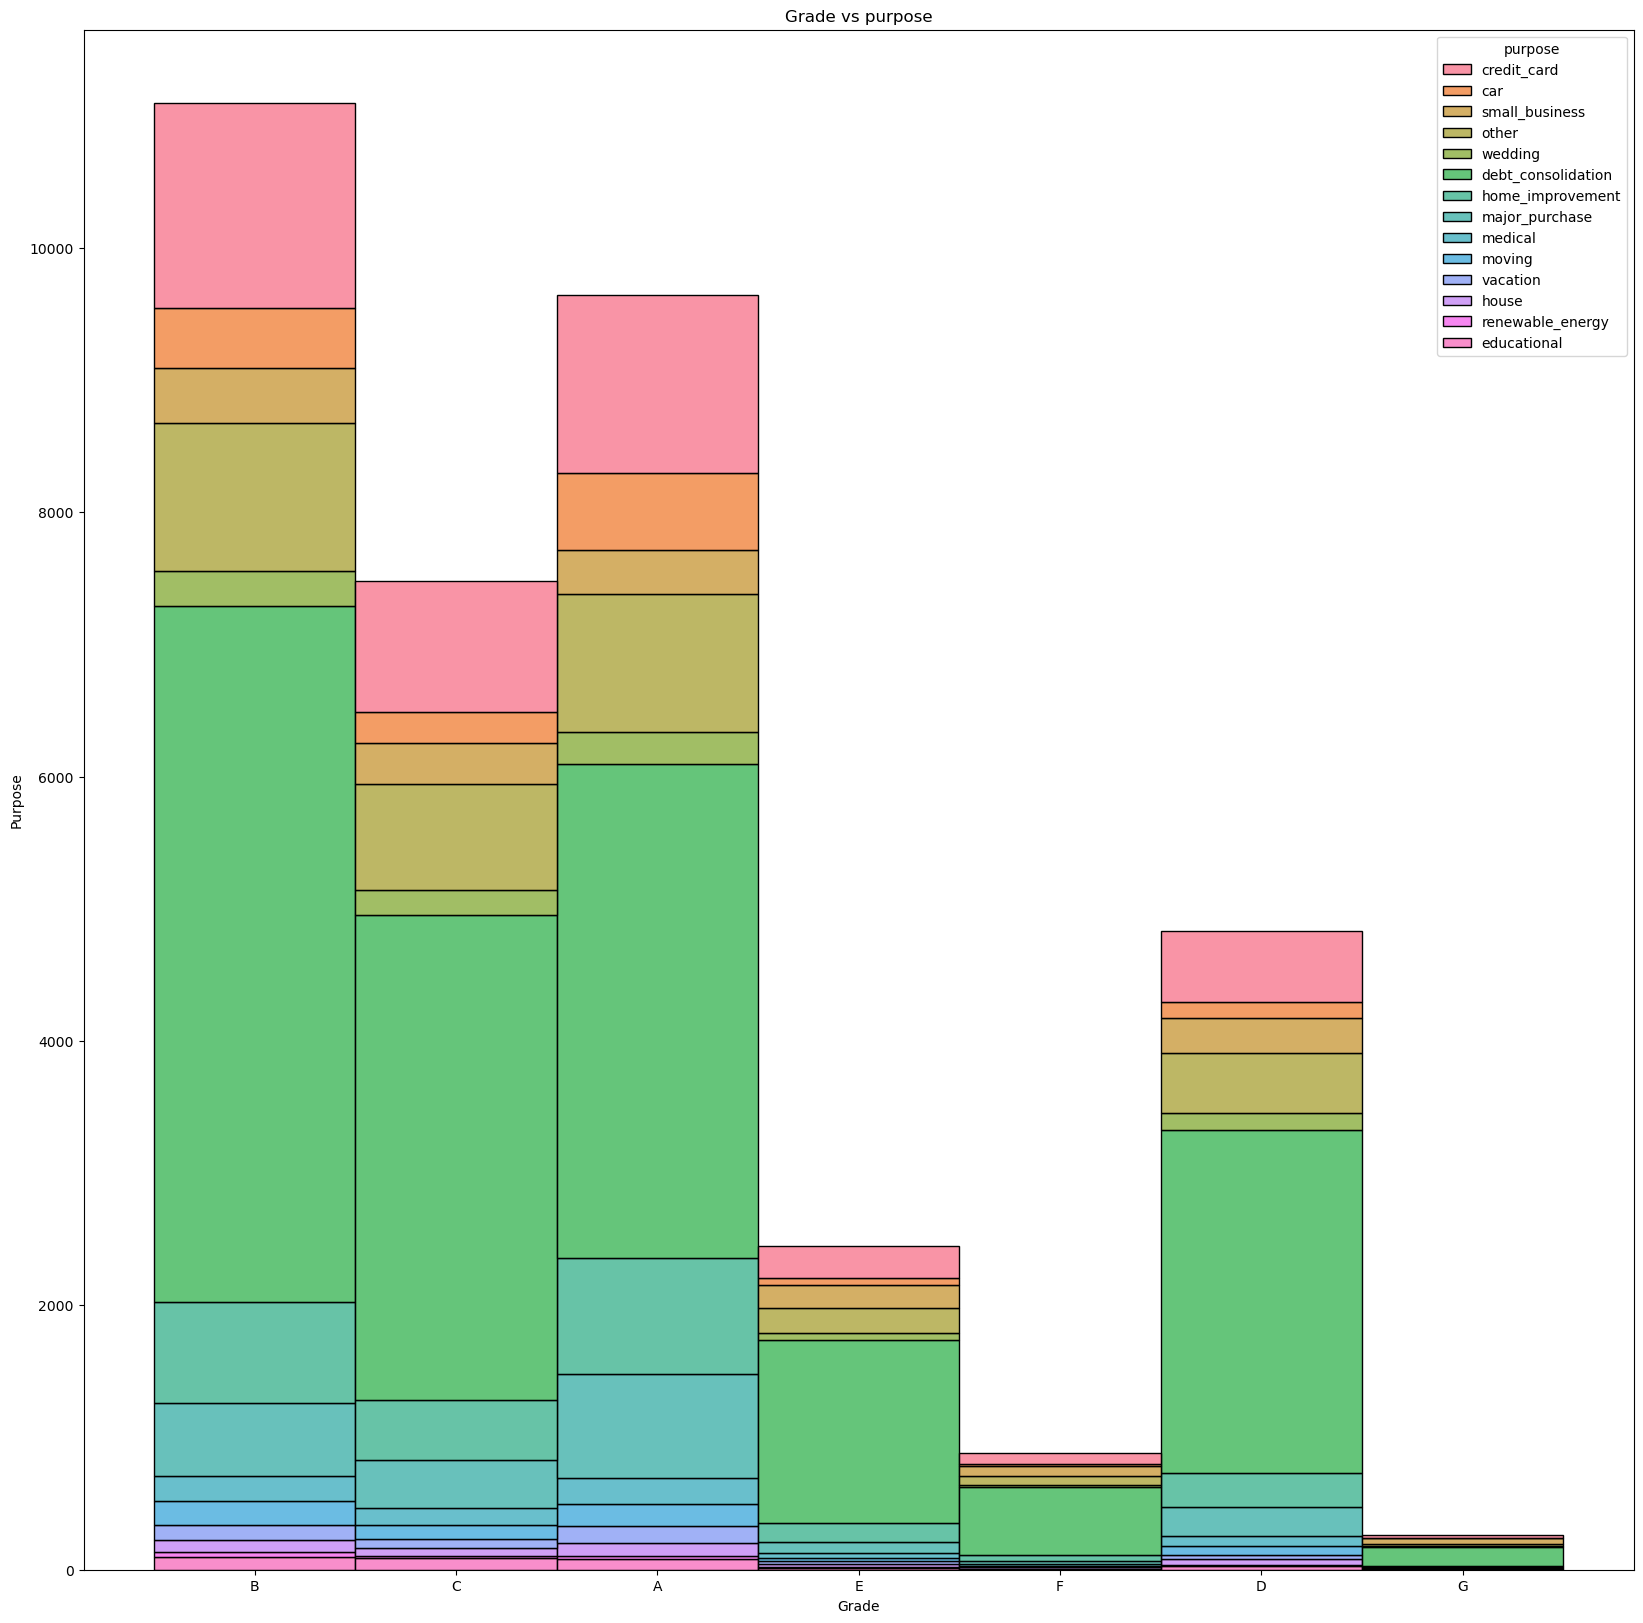

In [261]:
pyplot.figure(figsize=(20,20))
ax = sbs.histplot(binwidth=0.5, x="grade", hue="purpose", data=loan_ds, stat="count", multiple="stack")
ax.set_title("Grade vs purpose")
ax.set_xlabel("Grade")
ax.set_ylabel("Purpose")
pyplot.show()

In [ ]:
# No direct relationship between grade and purpose

In [ ]:
#### 3.Funded Amount vs House Ownership

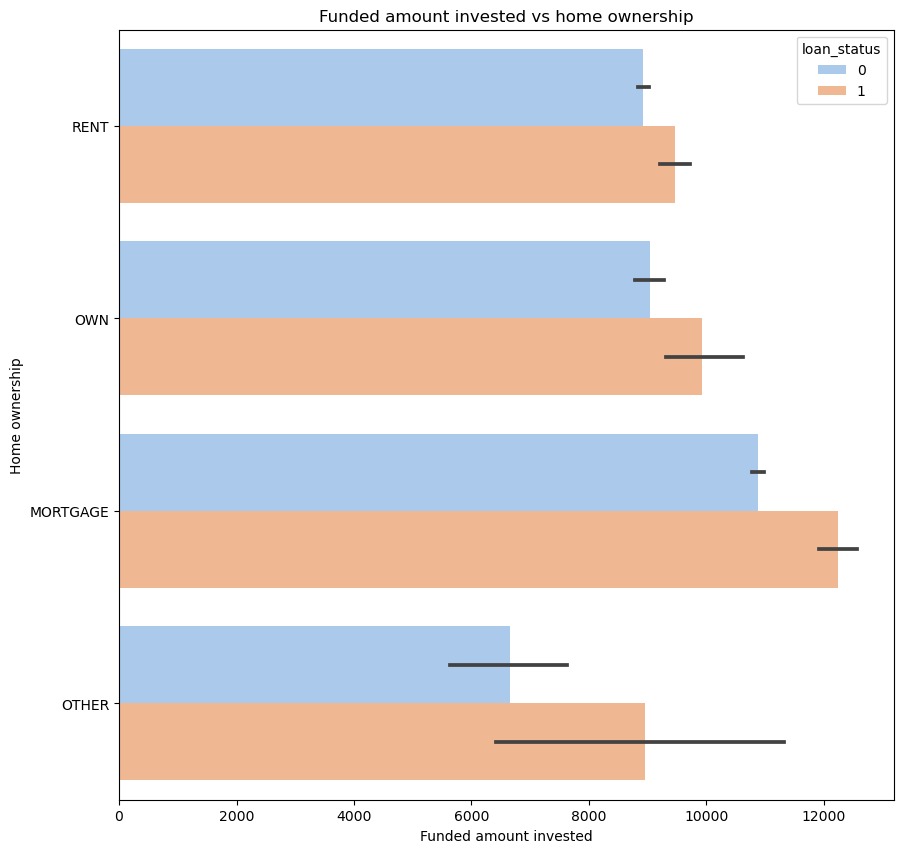

In [262]:
pyplot.figure(figsize=(10,10))
ax = sbs.barplot(data =loan_ds,x='funded_amnt_inv', y='home_ownership', hue ='loan_status',palette="pastel")
ax.set_title("Funded amount invested vs home ownership")
ax.set_xlabel("Funded amount invested")
ax.set_ylabel("Home ownership")
pyplot.show()

In [ ]:
# Applicants living in mortage took higher amount and defaulting is also higher in mortage group

In [ ]:
#### 4.Funded amount vs month issued and year issued

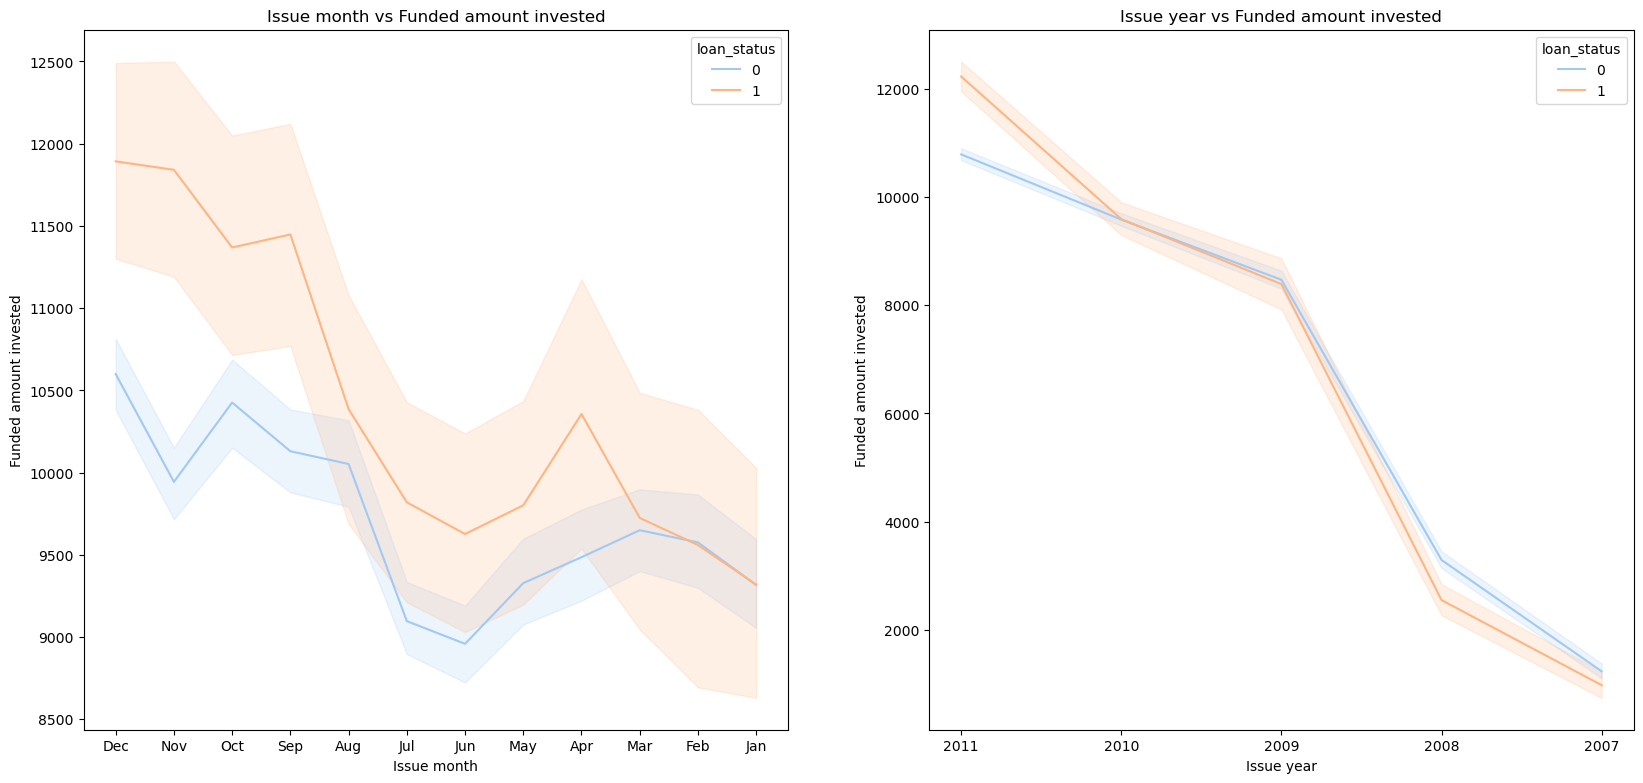

In [264]:
pyplot.figure(figsize=(20,20))
pyplot.subplot(221)
ax = sbs.lineplot(data =loan_ds,y='funded_amnt_inv', x='issue_month', hue ='loan_status',palette="pastel")
ax.set_title("Issue month vs Funded amount invested")
ax.set_xlabel("Issue month")
ax.set_ylabel("Funded amount invested")
pyplot.subplot(222)
ax1 =sbs.lineplot(data =loan_ds,y='funded_amnt_inv', x='issue_year', hue ='loan_status',palette="pastel")
ax1.set_title("Issue year vs Funded amount invested")
ax1.set_xlabel("Issue year")
ax1.set_ylabel("Funded amount invested")
pyplot.show()

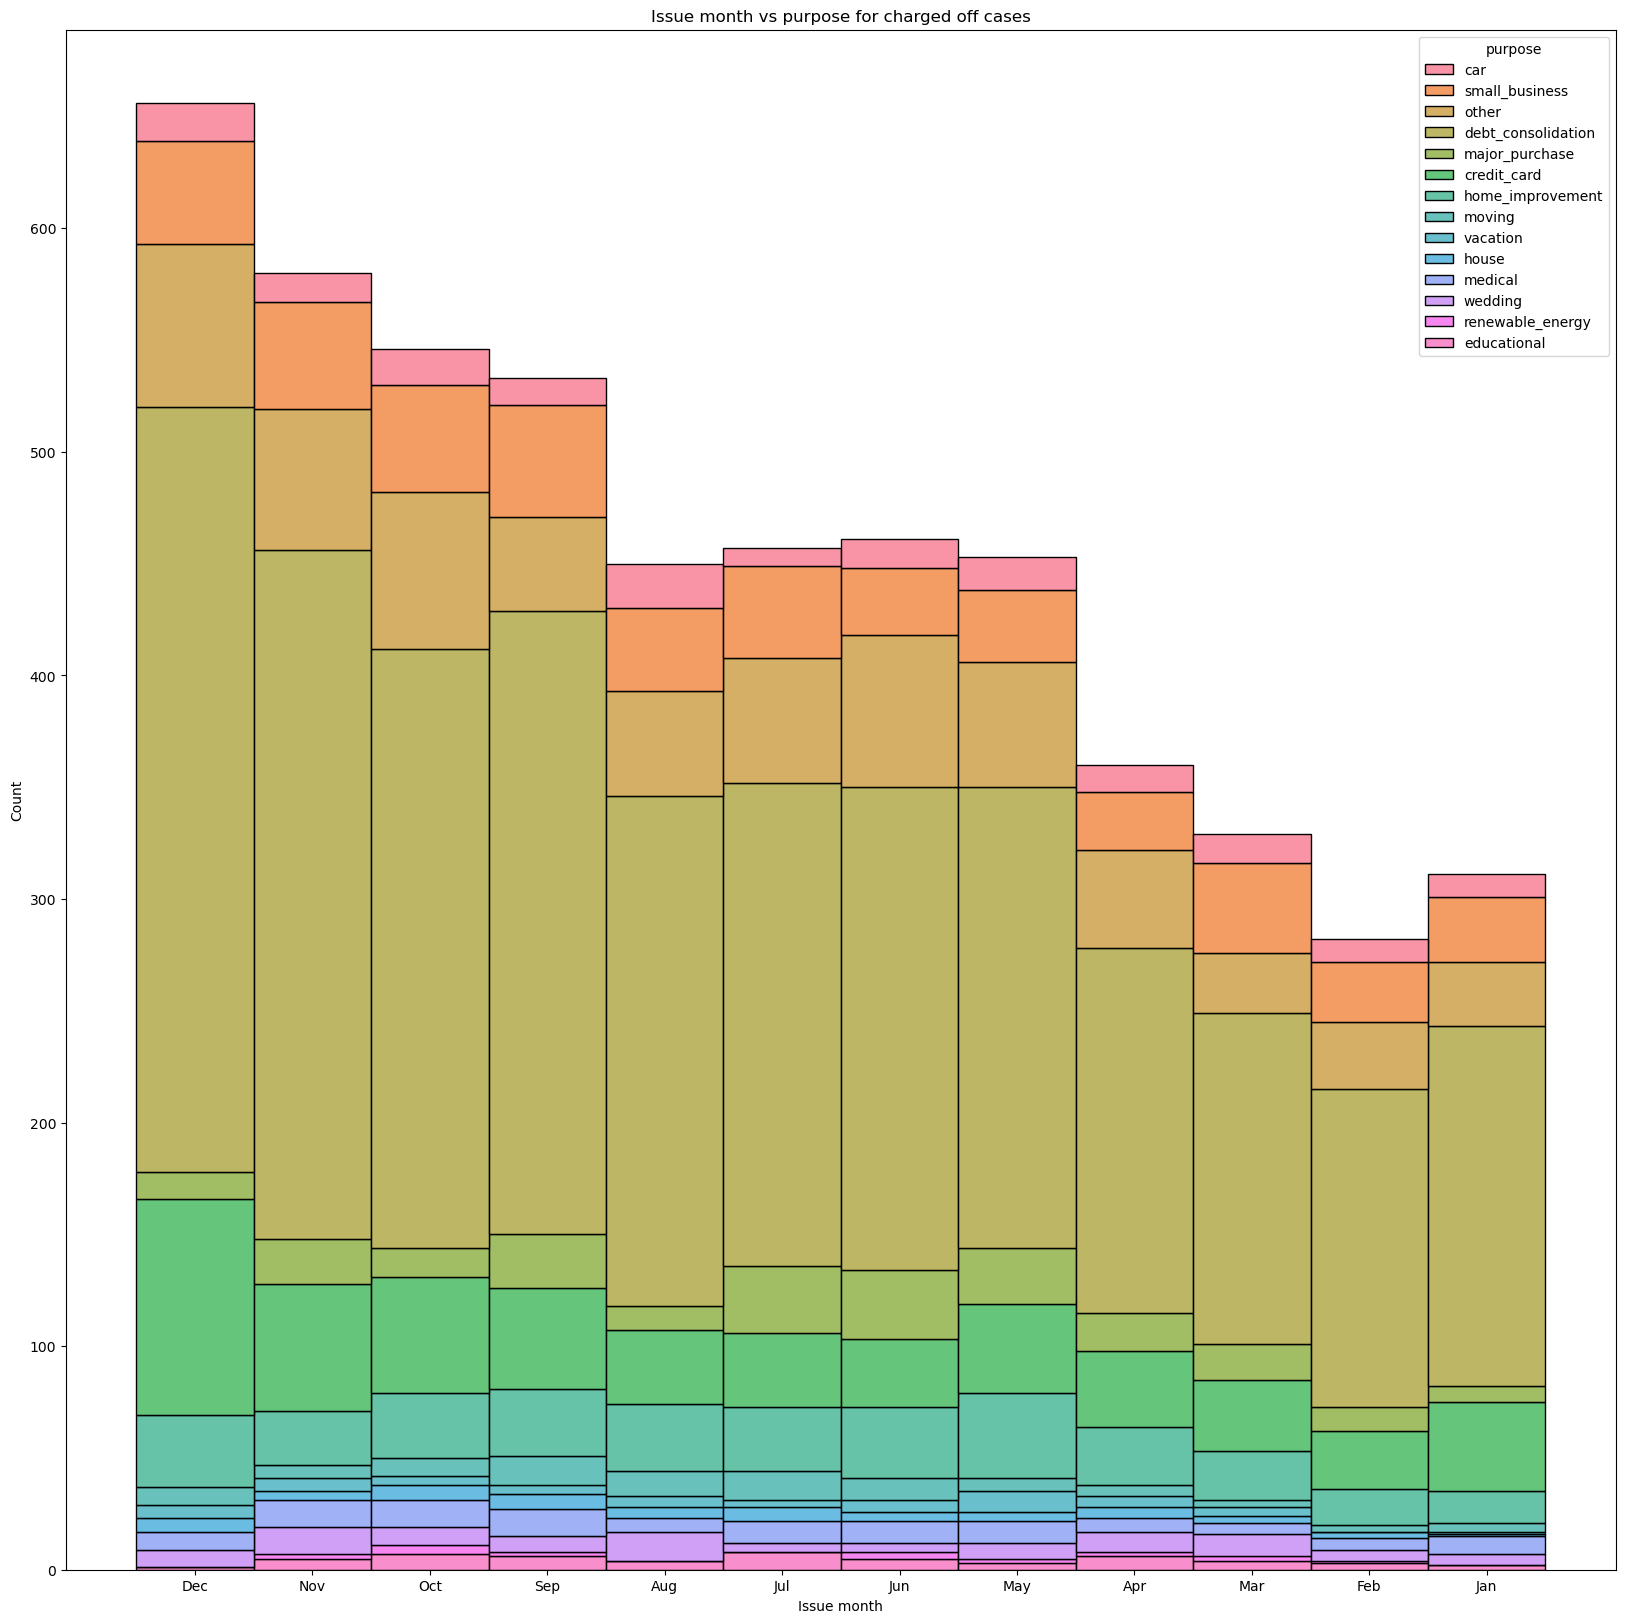

In [265]:
# Purpose vs issue month
pyplot.figure(figsize=(20,20))
sbs.color_palette("tab10")
ax =sbs.histplot(binwidth=0.5, x="issue_month" ,hue="purpose", data=loan_ds[(loan_ds['loan_status']==1)], stat="count", multiple="stack")
ax.set_title("Issue month vs purpose for charged off cases")
ax.set_xlabel("Issue month")
pyplot.show()

In [ ]:
# Issue month vs purpose: Max defaulting that is issued in the december month is for debt consoliation and credit card

In [ ]:
#### 5.Funded amount inv vs Grade

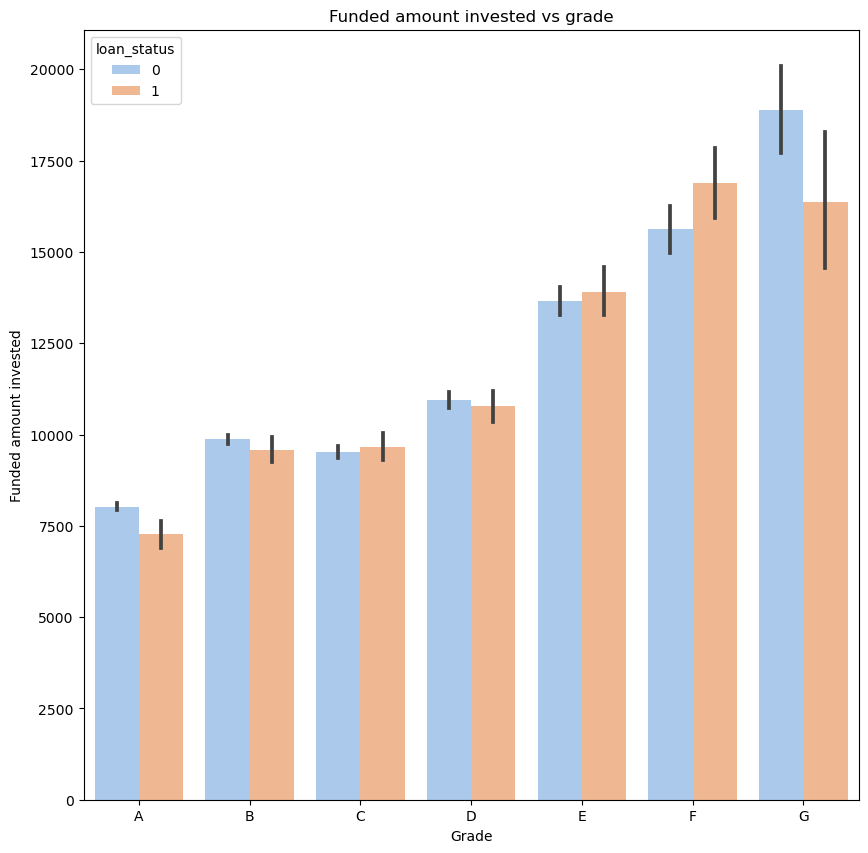

In [267]:
pyplot.figure(figsize=(10,10))
ax = sbs.barplot(data =loan_ds,y='funded_amnt_inv', x='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
ax.set_title("Funded amount invested vs grade")
ax.set_xlabel("Grade")
ax.set_ylabel("Funded amount invested")
pyplot.show()

In [ ]:
# Funded amount inv vs grade : Grade 'F' and 'G' have highest defaulting compared to other groups

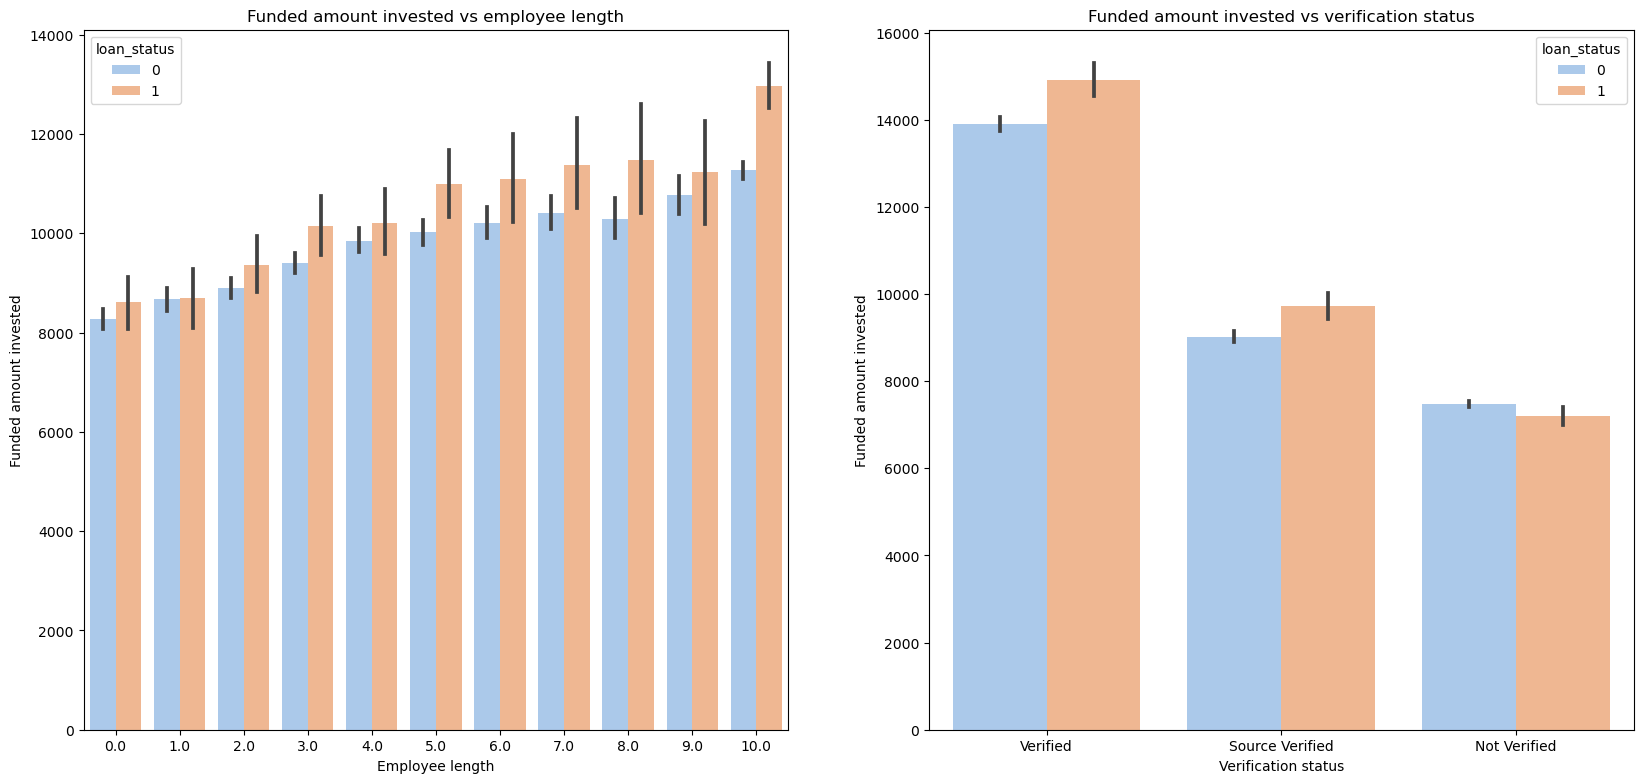

In [268]:
pyplot.figure(figsize=(20,20))
pyplot.subplot(221)
ax = sbs.barplot(data =loan_ds,y= 'funded_amnt_inv', x='emp_length', hue ='loan_status',palette="pastel")
ax.set_title("Funded amount invested vs employee length")
ax.set_xlabel("Employee length")
ax.set_ylabel("Funded amount invested")
pyplot.subplot(222)
ax2 = sbs.barplot(data =loan_ds,y= 'funded_amnt_inv', x='verification_status', hue ='loan_status',palette="pastel")
ax2.set_title("Funded amount invested vs verification status")
ax2.set_xlabel("Verification status")
ax2.set_ylabel("Funded amount invested")
pyplot.show()

In [ ]:
# Emp length vs funded amnt inv: funded amnt inv increases as emp length increases but the max defaulting is with 10 + years

In [ ]:
### Employees with longer working history got the loan approved for a higher amount. 
#- Looking at the verification status data, verified loan applications tend to have higher loan amount. 
#Which might indicate that the firms are first verifying the loans with higher values.

In [ ]:
### Purpose vs int_rate

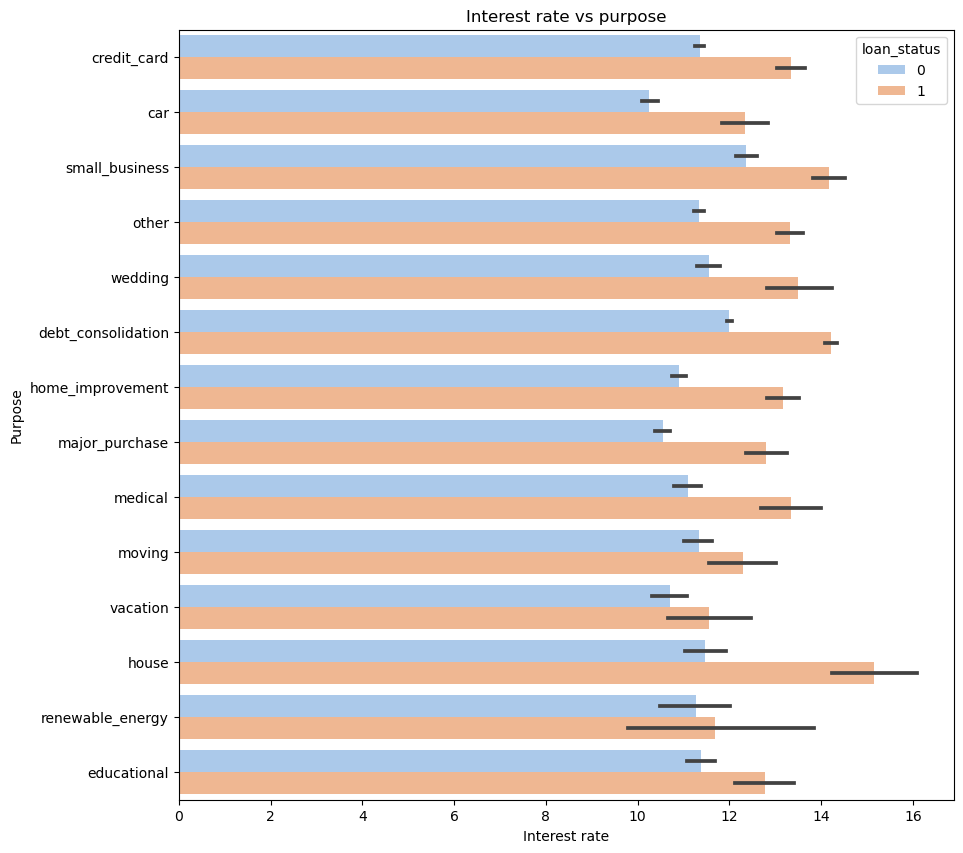

In [269]:
pyplot.figure(figsize=(10,10))
ax= sbs.barplot(data =loan_ds,x='int_rate', y='purpose',palette="pastel",hue='loan_status')
ax.set_title("Interest rate vs purpose")
ax.set_xlabel("Interest rate")
ax.set_ylabel("Purpose")
pyplot.show()

In [271]:
pyplot.figure(figsize=(10,10))
ax = sbs.boxplot(data =loan_ds[(loan_ds['loan_status']==1)],x='int_rate', y='purpose')
ax.set_title("Interest rate vs purpose for charged off cases")
ax.set_xlabel("Interest rate")
ax.set_ylabel("Purpose")
pyplot.show()

In [272]:
# Find relationship between categorical values
loan_ds1 = loan_ds[(loan_ds['loan_status'] == 1)]
pd.crosstab(loan_ds1.purpose, loan_ds1.int_rate_groups)

int_rate_groups     5%-9%  9%-13%  13%-17%  17%-21%  21%-25%
purpose                                                     
car                    30      67       42       19        1
credit_card            61     194      181       72       11
debt_consolidation    231     791      986      549      120
educational             4      28       18        4        0
home_improvement       39     119      121       36        7
house                   2      12       24       13        4
major_purchase         37      69       83       28        0
medical                11      39       39       11        4
moving                 17      40       22        9        2
other                  80     207      229       74       15
renewable_energy        6       6        4        1        1
small_business         37     148      159       85       25
vacation               14      23       11        4        0
wedding                 9      33       37       12        1

In [ ]:
# Interest rate vs purpose: Higher interest group 17%-21%	21%-25% max defaulters are for debt consolidation and small busines

In [ ]:
#### grade vs interest rate

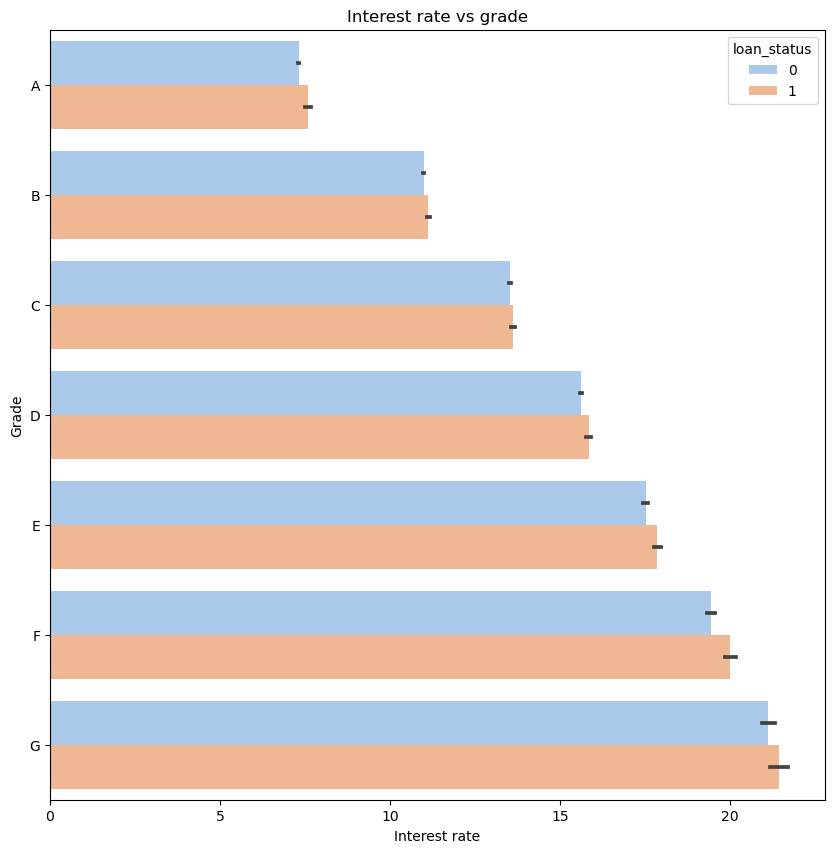

In [273]:
pyplot.figure(figsize=(10,10))
ax = sbs.barplot(data =loan_ds,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
ax.set_title("Interest rate vs grade")
ax.set_xlabel("Interest rate")
ax.set_ylabel("Grade")
pyplot.show()

In [ ]:
# As the grade increases interest rate increases

<Figure size 640x480 with 0 Axes>

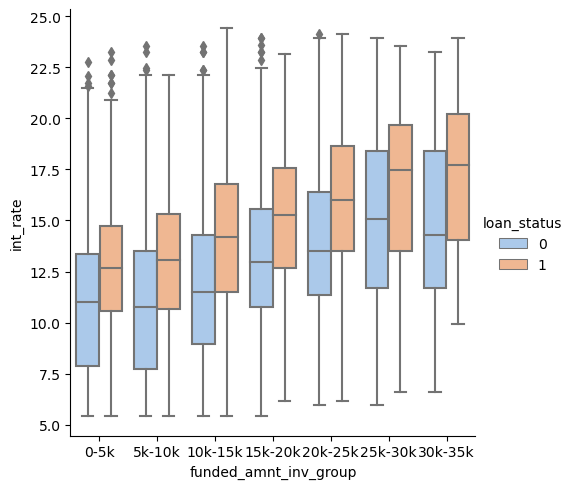

In [278]:
# Funded amnt inv group vs int rate
pyplot.tight_layout()
ax = sbs.catplot(data =loan_ds,y ='int_rate', x ='funded_amnt_inv_group', hue ='loan_status',palette="pastel",kind = 'box')
pyplot.show()

In [ ]:
### The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups. 
#- This can be a possible strong driving factor for loan defaulting.

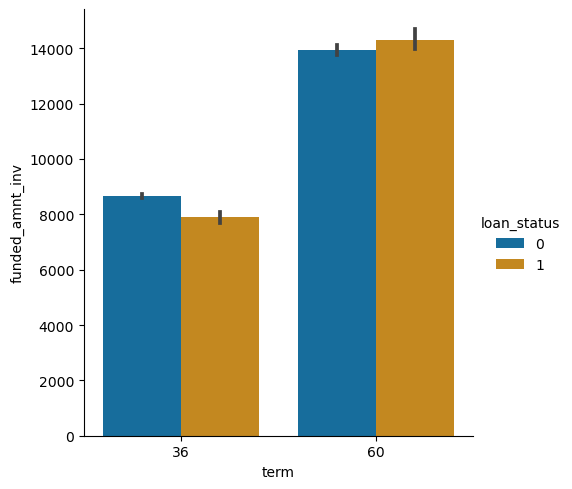

In [279]:
sbs.catplot(x = 'term', y = 'funded_amnt_inv', data = loan_ds,hue = 'loan_status', kind = 'bar')
pyplot.show()

In [ ]:
### Applicants with higher term tend to default more for higher loan amount
#- Which means that applicants applying for long term has applied for more loan. 

##### Observations

##### The above analysis with respect to the charged off loans. There is a more probability of defaulting when : 

##### - Mdembers taking loan for 'home improvement' and have income of 60k -70k
##### - Members whose home ownership is 'MORTGAGE and have income of 60-70k
##### - Members who receive interest at the rate of 21-24% and have an income of 70k-80k
##### - Members who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
##### - Members who have taken a loan for small business and the loan amount is greater than 14k
##### - Members whose home ownership is 'MORTGAGE and have loan of 14-16k
##### - grade is F and loan amount is between 15k-20k
##### - employment length is 10yrs and loan amount is 12k-14k 
##### - the loan is verified and loan amount is above 16k
##### - For grade G and interest rate above 20%

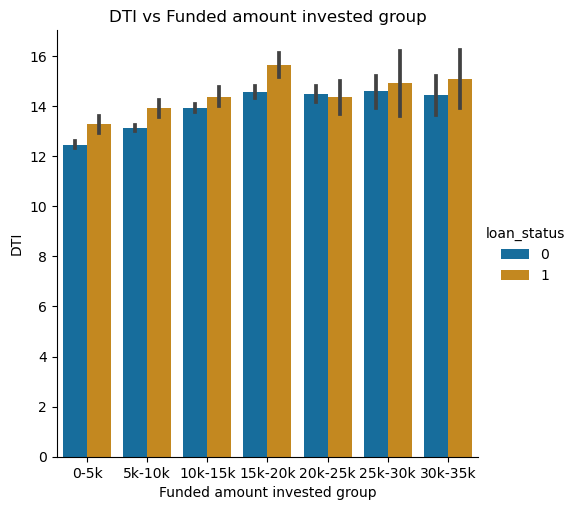

In [293]:
ax = sbs.catplot(y = 'dti', x = 'funded_amnt_inv_group', data = loan_ds,hue = 'loan_status', kind = 'bar')
ax.set(xlabel = 'Funded amount invested group', ylabel = 'DTI',title='DTI vs Funded amount invested group')
pyplot.show()

In [ ]:
# Applicants with higher DTI tend to default more and the 15k to 20k group have higher DTI

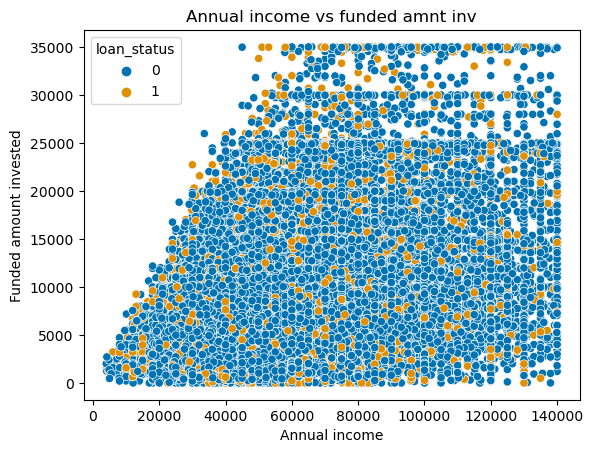

In [291]:
# Annual income vs funded amnt inv
ax = sbs.scatterplot(data=loan_ds,y = 'funded_amnt_inv' ,x = 'annual_inc', hue='loan_status')
ax.set(xlabel = 'Annual income', ylabel = 'Funded amount invested',title='Annual income vs funded amnt inv')
pyplot.show()

In [ ]:
# As the annual amount increases , funded amount inv also increases

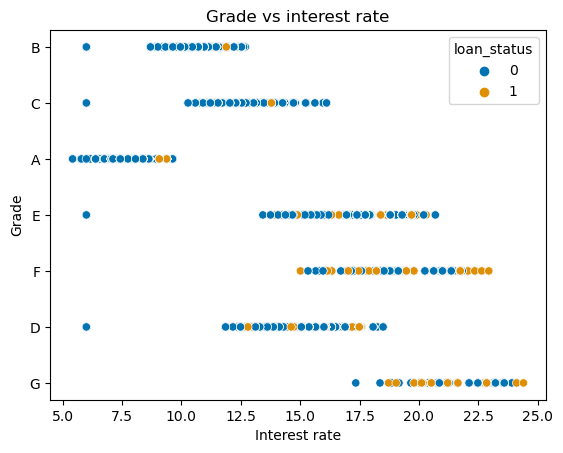

In [290]:
# Grade vs interest rate
ax = sbs.scatterplot(data=loan_ds,y = 'grade' ,x = 'int_rate', hue='loan_status')
ax.set(xlabel = 'Interest rate', ylabel = 'Grade',title='Grade vs interest rate')
pyplot.show()

In [284]:
# Cross tab for categorical values for charged off status
loan_ds1 = loan_ds[(loan_ds['loan_status'] == 1)]
pd.crosstab(loan_ds1.grade, loan_ds1.int_rate_groups)

int_rate_groups  5%-9%  9%-13%  13%-17%  17%-21%  21%-25%
grade                                                    
A                  559      34        0        0        0
B                   19    1357        0        0        0
C                    0     352      973        0        0
D                    0      33      799      248        0
E                    0       0      178      482        0
F                    0       0        6      151      132
G                    0       0        0       36       59

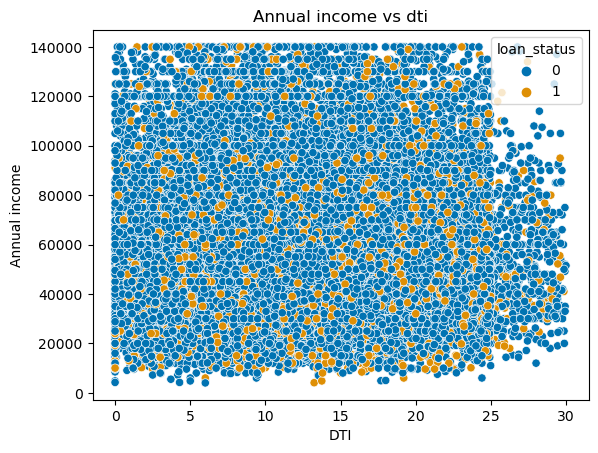

In [289]:
# Annual income vs dti
ax = sbs.scatterplot(data=loan_ds,y = 'annual_inc' ,x = 'dti', hue='loan_status')
ax.set(xlabel = 'DTI', ylabel = 'Annual income',title='Annual income vs dti')
pyplot.show()

In [ ]:
# No strong relationship b/w annual income and dti

In [286]:
# cross tab for Term and interest rate for charged off group
loan_ds1 = loan_ds[(loan_ds['loan_status'] == 1)]
pd.crosstab(loan_ds1.term, loan_ds1.int_rate_groups)

int_rate_groups  5%-9%  9%-13%  13%-17%  17%-21%  21%-25%
term                                                     
36                 536    1250     1130      185       13
60                  42     526      826      732      178

In [ ]:
# Higher interest rate tend to be in 60 months tenure 

In [287]:
ax = sbs.boxplot(data=loan_ds_charged_off, x="term", y="int_rate")
ax.set(xlabel = 'Loan Status', ylabel = 'Interest Rate')
ax.set_title("Interest rest details")
pyplot.show()

In [ ]:
# Interest rate for 60 months tend to be on higher side as the IQR differnce is also quite high between 36 months and 60 months

In [168]:
# Term vs grade
pd.crosstab(loan_ds_charged_off['term'],loan_ds_charged_off['grade'])

grade    A    B    C    D    E    F   G
term                                   
36     565  985  844  580  176   56  21
60      37  440  503  538  539  263  80

In [ ]:
#Term vs grade: for charged off cases the loan defaulting increases from grade  D to G when the term is higher


In [169]:
# Term vs emp length
pd.crosstab(loan_ds_charged_off['term'],loan_ds_charged_off['emp_length'])

emp_length  0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0
term                                                                        
36           429   302   356   332   279   251   165   134   111    84   630
60           210   154   211   223   183   207   142   129    92    74   701

In [171]:
# Term vs emp length
pd.crosstab(loan_ds_charged_off['term'],loan_ds_charged_off['home_ownership'])

home_ownership  MORTGAGE  OTHER  OWN  RENT
term                                      
36                  1181     17  252  1777
60                  1146      1  191  1062

In [ ]:
# Term vs emp length : No inference

In [173]:
# Verification status vs term
pd.crosstab(loan_ds['term'],loan_ds['verification_status'])

verification_status  Not Verified  Source Verified  Verified
term                                                        
36                          14141             6616      6964
60                           2139             2539      4255

In [ ]:
# Verification status vs term : No inference

In [174]:
# issue_month vs term
pd.crosstab(loan_ds['term'],loan_ds['issue_month'])

issue_month   Apr   Aug   Dec   Feb   Jan   Jul   Jun   Mar   May   Nov   Oct  \
term                                                                            
36           2135  2354  3041  1804  1852  2404  2176  1981  2016  2944  2608   
60            578   861   978   447   416   792   832   571   772   876   925   

issue_month   Sep  
term               
36           2406  
60            885

In [ ]:
# issue_month vs term : no inference

In [175]:
# purpose vs term
pd.crosstab(loan_ds['term'],loan_ds['purpose'])

purpose  car  credit_card  debt_consolidation  educational  home_improvement  \
term                                                                           
36       949         3890               12632          296              1855   
60       499          893                4673           16               701   

purpose  house  major_purchase  medical  moving  other  renewable_energy  \
term                                                                       
36         241            1646      495     465   3022                70   
60          97             400      146      85    677                25   

purpose  small_business  vacation  wedding  
term                                        
36                 1145       311      704  
60                  478        54      189

In [ ]:
# purpose vs term: No inference

In [177]:
# term vs dti
ax = sbs.boxplot(data=loan_ds_charged_off, x="term", y="dti")
ax.set(xlabel = 'Term', ylabel = 'DTI')
ax.set_title("DTI term rest details")
pyplot.show()

In [ ]:
# term vs DTI : no inference

In [183]:
# Employee length vs interest rate group
pd.crosstab(loan_ds['emp_length'],loan_ds['int_rate_groups'])

int_rate_groups  5%-9%  9%-13%  13%-17%  17%-21%  21%-25%
emp_length                                               
0.0               1105    1622     1255      305       40
1.0                678    1227      885      220       33
2.0                946    1635     1177      297       46
3.0                949    1428     1092      313       42
4.0                798    1111      971      274       46
5.0                787    1113      824      274       46
6.0                549     736      577      185       26
7.0                408     611      444      159       22
8.0                372     489      352      111       19
9.0                315     422      307       98       11
10.0              2150    2738     2088      792      120

In [ ]:
# Employee length vs interest rate group : No inference

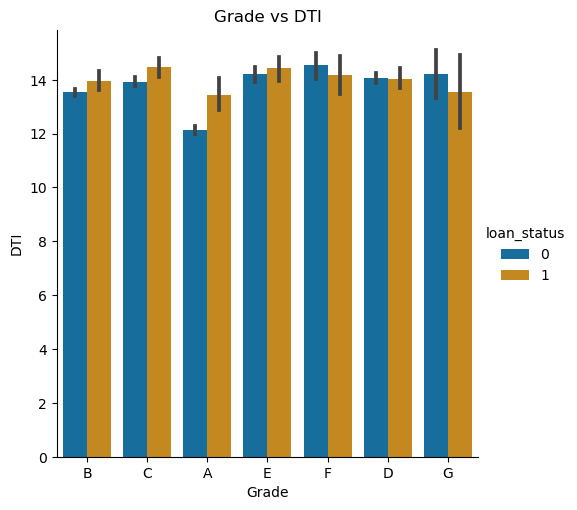

In [294]:
# Grade vs dti
ax = sbs.catplot(y = 'dti', x = 'grade', data = loan_ds,hue = 'loan_status', kind = 'bar')
ax.set(xlabel = 'Grade', ylabel = 'DTI',title='Grade vs DTI')
pyplot.show()

In [ ]:
# Grade vs dti - No inference

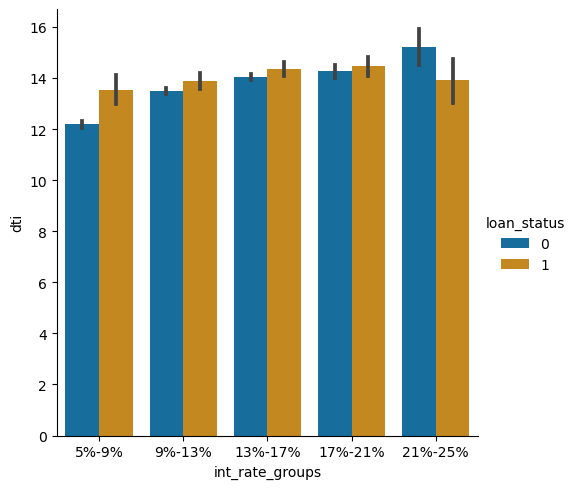

In [295]:
# Interest rate group vs dti
sbs.catplot(y = 'dti', x = 'int_rate_groups', data = loan_ds,hue = 'loan_status', kind = 'bar')
ax.set(xlabel = 'Interest Rate groups', ylabel = 'DTI',title='Interest rate group vs DTI')
pyplot.show()

In [ ]:
# Interest rate group vs dti -> No inference

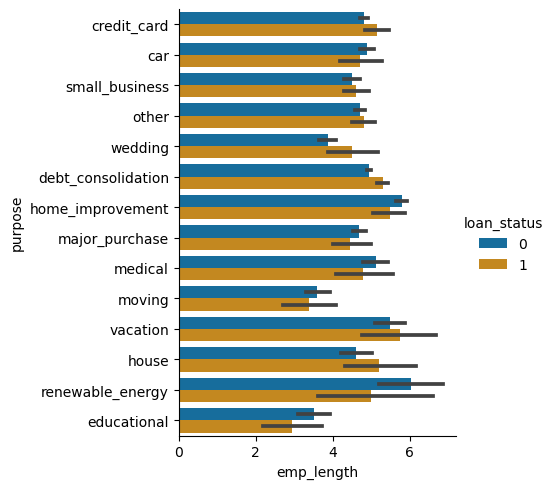

In [298]:
# Purpose group vs empl length
sbs.catplot(y = 'purpose', x = 'emp_length', data = loan_ds,hue = 'loan_status', kind = 'bar')
ax.set(xlabel = 'Employee length', ylabel = 'Purpose',title='Purpose vs employee length')
pyplot.show()

In [ ]:
# Purpose group vs empl length -> no significance

##### Bivariate analysis for charged off cases is high 
##### 1. annual income vs purpose: when in lower income for education loan and higher income for house improvement, house, small business
##### 2. annual income vs home ownership: higher income group is on mortgage and mortage tend to default more
##### 3. annual income vs funded_amnt_inv: high loan amount group tend to default more
##### 4. annual income vs interest rate: Irrespective of the annual income , the defaulting is higher in higher interest	rate group 21-25%
##### 5. annual income vs term: with higher term the defaulting seems to increase
##### 6. annual income vs grade: irrspective of the annual income as the grade increases the defauling increases
##### 7. annaul income vs emp_length: annual income increases as emp length increases also ppl with higher income tend to 	default more	
##### 8. funded_amnt_inv vs interest rate: Interest rate increases with funded_amnt_inv and higher interest more defaulting
##### 9. Funded amnt inv V/s purpose: In the lower segment below 7k defaulting is more for education loan and vacation
#####    and in higher amount it is more for small business, debt consoliation and credit card
##### 10. Funded amnt inv v/s home_ownership: Applicants living in mortage took higher amount and defaulting is also   higher in    mortage group
##### 11. Funded amnt inv v/s issue date: Irrespective on the amont max defaulting  in dec.	
##### 12. Issue month vs purpose: Max defaulting that is issued in the december month is for debt consoliation and credit 	card 
##### 13. Funded amount inv vs grade : Grade 'F'  and 'G' have highest defaulting
##### 14. Emp length vs funded amnt inv: funded amnt inv increases as emp length increases but the max defaulting is with 10+ years 
##### 15. funded amnt inv vs verification status: verfied status gets higher loan and higher loan defaults since the amount is higher.
#####  16. Interest rate group vs purpose: Higher interest group 17%-21%	21%-25% max defaulters are for debt consolidation and small business
##### 15. Grade vs interest rate: As the grade increases from A to G interest rate increases and max defaulting in F and G
#####      21-25% group have the highest defaulting in grade F and G ????
##### 16. Funded amnt inv group vs int_rate: As the funded amount increases , the interest rate also increases and in the   same funded amount inv #####        group defaulting is higher when the interest rate is higher . 				   
##### 17. term vs funded amount inv: Applicants with higher term tend to default more for higher loan amount
#####      Which means that applicants applying for long term has applied for more loan amount. 
##### 18. funded amnt inv vs dti: Applicants with higher DTI close to 16 tend to default more and the funded amount inv group of 15k to 20k group                 have higher DTI
##### 19. Funded amnt inv vs annual income: As the annual income amount increases , funded amount inv also increases
##### 20. Interest rate vs term : for charged off cases the interest rate for 60 months duration is higher.
##### 21. Term vs grade: for charged off cases the loan defaulting increases from grade  D to G when the term is higher


##### Multivariate analysis from pair plot:
##### 1. Funded_amnt_inv V/s interest rate: Defaulting more as the interest rate increases irrespecive of the funded amount inv
##### 2.Funded_amnt_inv v/s term : Defaulting seems to be more in higher term group
##### 3.Funded_amnt_inv v/s dti: defaulting higher as funded amount invested increses irrespective of the dti
##### 4. Interest rate: defaulting higher in higher interest rate and with a bit of lesser income.

